# Analysis of temperature/buoyancy eddy flux

This notebooks explores the properties of eddy fluxes of buoyancy under different rotations.

One way to decompose the eddy fluxes of buoyancy is to rotate to a coordinate system aligned with the mean buoyancy surfaces. Partial motivation for this comes from the quasi-adiabatic behavior of instantaneous flows in stratified fluids. However, do not assume that just because the instantaneous flow is adiabatic the eddy fluxes would be only along mean buoyancy surfaces. 

A second way to decompose the eddy fluxes is by 
(i) assuming that the eddy fluxes can be represented as a diffusive flux. 
(ii) The symmetric and anti-symmetric parts of the diffusivity tensor give two parts of the flux. 

## Rotation to mean buoyancy coordinate

The unit vector normal to a buoyancy surface is  
\begin{equation}
\mathbf{n} = \frac{\nabla \overline{b}}{|\nabla \overline{b}|}
\end{equation}

The eddy flux can then be written as (note that we consider buoyancy, but this rotation can be done for any tracer)
\begin{equation}
\mathbf{F} = \mathbf{F}_\perp + \mathbf{F}_\parallel
\end{equation}

The two components are
\begin{equation}
\mathbf{F}_\perp = (\mathbf{F}. \mathbf{n}) \mathbf{n}, \qquad \mathbf{F}_\parallel = (\mathbf{n} \times \mathbf{F}) \times \mathbf{n}
\end{equation}

The parallel component is also referred to as the skew flux. One property of this flux is that its divergence can be written in purely advective form using the indentity $\nabla . (\mathbf{A} \times \nabla \phi) = \nabla \phi. (\nabla \times \mathbf{A})$ :

\begin{equation}
\nabla.(\mathbf{F}_\parallel)  = (\nabla \times (\mathbf{n} \times F)).\mathbf{n} = \left(\nabla \times \frac{\mathbf{n} \times F}{|\nabla \overline{b}|}\right).\nabla \overline{b} = (\nabla \times \mathbf{\psi^*}). \nabla \overline{b} = \mathbf{v^*}. \nabla \overline{b}
\end{equation}


In [1]:
# load modules 
import xarray as xr
from matplotlib import pyplot as plt
from xgcm import Grid, generate_grid_ds
import numpy as np
%matplotlib inline

In [2]:
params = {
   'axes.labelsize': 12,
   'font.size': 12,
   'legend.fontsize': 12,
   'xtick.labelsize': 12,
   'ytick.labelsize': 12,
   'text.usetex': False,
   'figure.figsize': [4.5, 4.5]
   }
plt.rcParams.update(params)

In [3]:
Model_Tav = xr.open_dataset('./outputs_ncfiles/Model_Tav.nc')

In [4]:
Lcoarse = 50e3
diff_tensor = xr.open_dataset('./outputs_ncfiles/diff_tensor_'+str(int(Lcoarse//1e3))+'km.nc')
Trac_coarse = xr.open_dataset('./outputs_ncfiles/Trac_coarse_'+str(int(Lcoarse//1e3))+'km.nc')
Vels_coarse = xr.open_dataset('./outputs_ncfiles/Vels_coarse_'+str(int(Lcoarse//1e3))+'km.nc')
T_coarse    = xr.open_dataset('./outputs_ncfiles/T_coarse_'+str(int(Lcoarse//1e3))+'km.nc')

In [5]:
grid = Grid(Model_Tav, periodic='X')

In [6]:
UpTp = grid.interp(Model_Tav.UTtave,'X') - grid.interp(Model_Tav.uVeltave, 'X')*Model_Tav.Ttave
VpTp = grid.interp(Model_Tav.VTtave,'Y', boundary='extend') - grid.interp(Model_Tav.vVeltave, 'Y', boundary='extend')*Model_Tav.Ttave
WpTp = grid.interp(Model_Tav.WTtave,'Z', boundary='extend') - grid.interp(Model_Tav.wVeltave, 'Z', boundary='extend')*Model_Tav.Ttave

In [7]:
T_z = -grid.interp(grid.diff(Model_Tav.Ttave, 'Z', boundary='extend'), 'Z', boundary='extend')/Model_Tav.drF
T_y =  grid.interp(grid.diff(Model_Tav.Ttave, 'Y', boundary='extend'), 'Y', boundary='extend')/5e3
T_x =  grid.interp(grid.diff(Model_Tav.Ttave, 'X'), 'X')/5e3

In [8]:
Fbmod = (UpTp**2 + VpTp**2 + WpTp**2)**0.5
gradbmod = (T_x**2 + T_y**2 + T_z**2)**0.5

In [9]:
Fb_perp_mod = (UpTp*T_x + VpTp*T_y + WpTp*T_z) / gradbmod
Fb_perp_x = Fb_perp_mod*T_x / gradbmod
Fb_perp_y = Fb_perp_mod*T_y / gradbmod
Fb_perp_z = Fb_perp_mod*T_z / gradbmod

In [10]:
Fb_para_x = UpTp - Fb_perp_x
Fb_para_y = VpTp - Fb_perp_y
Fb_para_z = WpTp - Fb_perp_z

## plots T flux

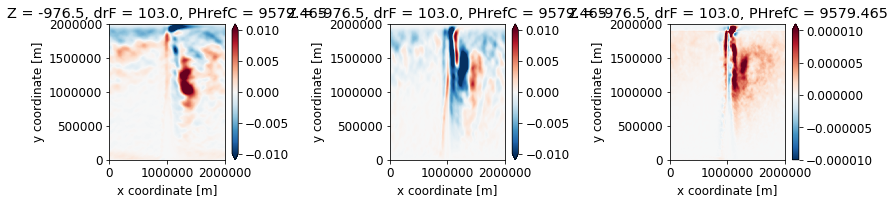

In [11]:
plt.figure(figsize=(12,3))

plt.subplot(131)
UpTp.sel(Z=-1000, method='nearest').plot(vmin=-1e-2)

plt.subplot(132)
VpTp.sel(Z=-1000, method='nearest').plot(vmin=-1e-2)

plt.subplot(133)
WpTp.sel(Z=-1000, method='nearest').plot(vmin=-1e-5)
plt.tight_layout()

The eddy fluxes in the horizontal directions are comparable in magnitude. While the vertical flux is small. 

## Plot T flux perp

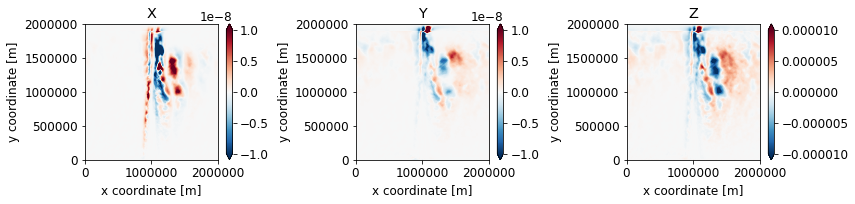

In [12]:
plt.figure(figsize=(12,3))

plt.subplot(131)
Fb_perp_x.sel(Z=-1000, method='nearest').plot(vmin=-1e-8)
plt.title('X')

plt.subplot(132)
Fb_perp_y.sel(Z=-1000, method='nearest').plot(vmin=-1e-8)
plt.title('Y')

plt.subplot(133)
Fb_perp_z.sel(Z=-1000, method='nearest').plot(vmin=-1e-5)
plt.title('Z')
plt.tight_layout()

The eddy flux perpendicular to the b gradient has the largest component in the vertical, and smaller ones in the horizontal. This is to be expected since the buoyancy surfaces are close to being flat. 

## Plot T flux para

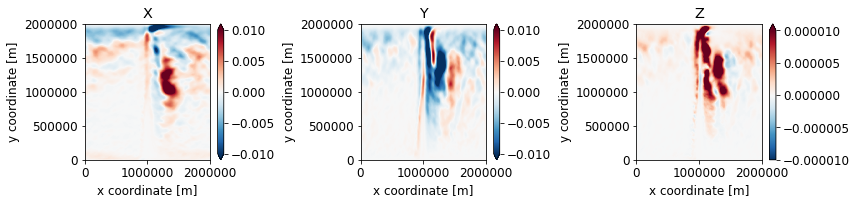

In [13]:
plt.figure(figsize=(12,3))

plt.subplot(131)
Fb_para_x.sel(Z=-1000, method='nearest').plot(vmin=-1e-2)
plt.title('X')

plt.subplot(132)
Fb_para_y.sel(Z=-1000, method='nearest').plot(vmin=-1e-2)
plt.title('Y')

plt.subplot(133)
Fb_para_z.sel(Z=-1000, method='nearest').plot(vmin=-1e-5)
plt.title('Z')

plt.tight_layout()

Look in PDF form 

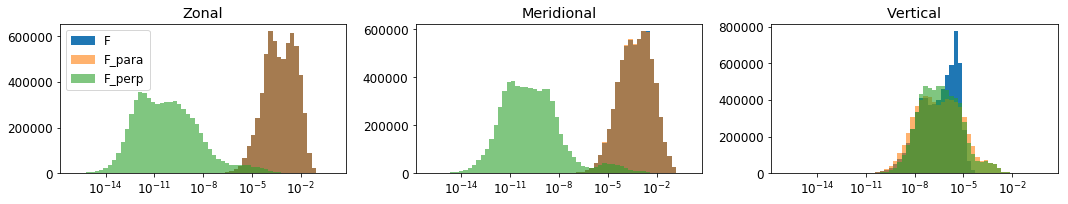

In [39]:
plt.figure(figsize=(15,3))

logbins = np.logspace(-16, 0, 61)

plt.subplot(131)
[_,_,_] = np.abs(UpTp).plot.hist(bins=logbins, label='F')
[_,_,_] = np.abs(Fb_para_x).plot.hist(bins=logbins, alpha=0.6, label='F_para')
[_,_,_] = np.abs(Fb_perp_x).plot.hist(bins=logbins, alpha=0.6, label='F_perp')
plt.xscale('log')
plt.legend()
plt.title('Zonal')

plt.subplot(132)
[_,_,_] = np.abs(VpTp).plot.hist(bins=logbins, label='uT')
[_,_,_] = np.abs(Fb_para_y).plot.hist(bins=logbins, alpha=0.6, label='uT_para')
[_,_,_] = np.abs(Fb_perp_y).plot.hist(bins=logbins, alpha=0.6, label='uT_perp')
plt.xscale('log')
#plt.legend()
plt.title('Meridional')

plt.subplot(133)
[_,_,_] = np.abs(WpTp).plot.hist(bins=logbins, label='uT')
[_,_,_] = np.abs(Fb_para_z).plot.hist(bins=logbins, alpha=0.6, label='uT_para')
[_,_,_] = np.abs(Fb_perp_z).plot.hist(bins=logbins, alpha=0.6, label='uT_perp')
plt.xscale('log')
#plt.legend()
plt.title('Vertical')

plt.tight_layout()

The buoyancy flux parallel to the mean contours looks quite similar to the horizontal fluxes. 

The vertical component of this flux adds with the vertical component of the perp component to give the vertical flux in cartesian coordinates. 

In [31]:
# divergences of these fluxes 
divF = grid.interp(grid.diff(UpTp, 'X'), 'X')/5e3 + \
       grid.interp(grid.diff(VpTp, 'Y', boundary='extend'), 'Y', boundary='extend')/5e3 + \
       -grid.interp(grid.diff(WpTp, 'Z', boundary='extend'), 'Z', boundary='extend')/Model_Tav.drF
    
divFperp =     grid.interp(grid.diff(Fb_perp_x, 'X'), 'X')/5e3 + \
       grid.interp(grid.diff(Fb_perp_y, 'Y', boundary='extend'), 'Y', boundary='extend')/5e3 + \
       -grid.interp(grid.diff(Fb_perp_z, 'Z', boundary='extend'), 'Z', boundary='extend')/Model_Tav.drF
        
divFpara =     grid.interp(grid.diff(Fb_para_x, 'X'), 'X')/5e3 + \
       grid.interp(grid.diff(Fb_para_y, 'Y', boundary='extend'), 'Y', boundary='extend')/5e3 + \
       -grid.interp(grid.diff(Fb_para_z, 'Z', boundary='extend'), 'Z', boundary='extend')/Model_Tav.drF
        


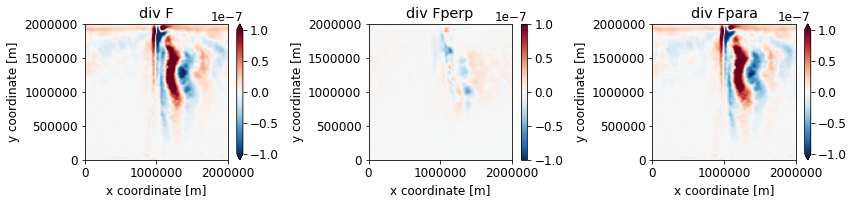

In [32]:
plt.figure(figsize=(12,3))
plt.subplot(131)
divF.sel(Z=-1000, method='nearest').plot(vmin=-1e-7)
plt.title('div F')

plt.subplot(132)
divFperp.sel(Z=-1000, method='nearest').plot(vmin=-1e-7)
plt.title('div Fperp')

plt.subplot(133)
divFpara.sel(Z=-1000, method='nearest').plot(vmin=-1e-7)
plt.title('div Fpara')

plt.tight_layout()

The divergence of the full flux is mostly a result of the divergence of the flux due to the parallel component. 

The non-zero divergence of perpendicular eddy flux of buoyancy is a reult of the dissipation and variance transport. Note that F_para does not enter the buoyancy variance equation. 


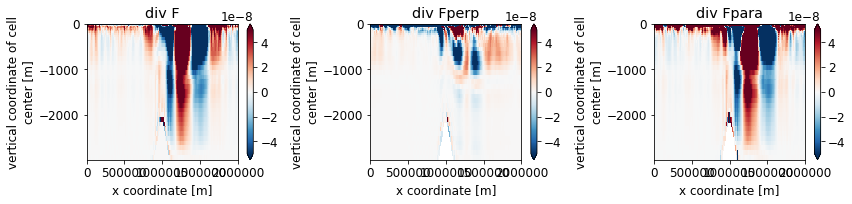

In [33]:
plt.figure(figsize=(12,3))
plt.subplot(131)
divF.sel(YC=1000e3, method='nearest').plot(vmin=-5e-8)
plt.title('div F')

plt.subplot(132)
divFperp.sel(YC=1000e3, method='nearest').plot(vmin=-5e-8)
plt.title('div Fperp')

plt.subplot(133)
divFpara.sel(YC=1000e3, method='nearest').plot(vmin=-5e-8)
plt.title('div Fpara')

plt.tight_layout()

Text(0.5, 1.0, 'Divergence')

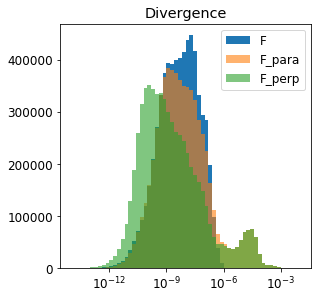

In [38]:
logbins = np.logspace(-14, -2, 61)

[_,_,_] = np.abs(divF).plot.hist(bins=logbins, label='F')
[_,_,_] = np.abs(divFpara).plot.hist(bins=logbins, alpha=0.6, label='F_para')
[_,_,_] = np.abs(divFperp).plot.hist(bins=logbins, alpha=0.6, label='F_perp')
plt.xscale('log')
plt.legend()
plt.title('Divergence')

Summary:
This analysis shows that the $\mathbf{F}_{perp}$ is much smaller than $\mathbf{F}_{para}$, and this is also the case for the divergence. However, while the $\mathbf{F}_{perp}$ is orders of magnitude smaller than $\mathbf{F}_{para}$, the $\nabla. \mathbf{F}_{perp}$ is only about an order of magnitude or less smaller than $\nabla.\mathbf{F}_{para}$. 

If the tracer fluxes are decomposed into flux due to quasi-stokes stream function and remaining. The divergence of the remaining flux is guaranteed to be zero. This remaining flux can be compared to the perpendicular flux, which has non zero divergence. This implies that a "perfect" parameterization would parameterize the quasi-stokes stream function, and not the along surface flux. 

However, this difference is small and may be neglected, considering the large uncertainities already present in the parameters (there is no perfect theory for the parameterization). MM2001 is only a theory for telling us what to parameterize. 

### Do the above analysis with spatially averaged data

In [59]:
Fbmod = (T_coarse.UpTp**2 + T_coarse.VpTp**2 + T_coarse.WpTp**2)**0.5
gradbmod = (T_coarse.T_X**2 + T_coarse.T_Y**2 + T_coarse.T_Z**2)**0.5

In [60]:
Fb_perp_mod = (T_coarse.UpTp*T_coarse.T_X + T_coarse.VpTp*T_coarse.T_Y + T_coarse.WpTp*T_coarse.T_Z) / gradbmod
Fb_perp_x = Fb_perp_mod*T_coarse.T_X / gradbmod
Fb_perp_y = Fb_perp_mod*T_coarse.T_Y / gradbmod
Fb_perp_z = Fb_perp_mod*T_coarse.T_Z / gradbmod

In [78]:
Fb_perp = xr.Dataset({'UpCp':Fb_perp_x, 'VpCp':Fb_perp_y, 'WpCp':Fb_perp_z})

In [61]:
Fb_para_x = T_coarse.UpTp - Fb_perp_x
Fb_para_y = T_coarse.VpTp - Fb_perp_y
Fb_para_z = T_coarse.WpTp - Fb_perp_z

In [79]:
Fb_para = xr.Dataset({'UpCp':Fb_para_x, 'VpCp':Fb_para_y, 'WpCp':Fb_para_z})

In [62]:
Fb_para_mod = (Fb_para_x**2 + Fb_para_y**2 + Fb_para_z**2)**0.5

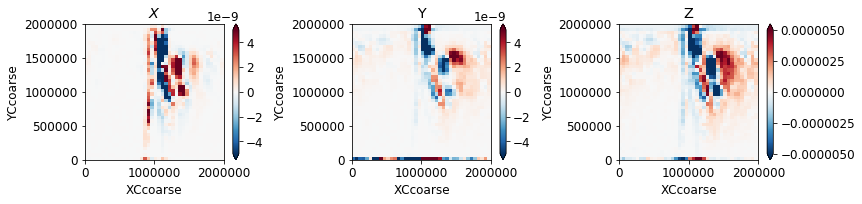

In [63]:
plt.figure(figsize=(12,3))

plt.subplot(131)
Fb_perp_x.sel(Z=-1000, method='nearest').plot(vmin=-5e-9)
plt.title('$X$')

plt.subplot(132)
Fb_perp_y.sel(Z=-1000, method='nearest').plot(vmin=-5e-9)
plt.title('Y')

plt.subplot(133)
Fb_perp_z.sel(Z=-1000, method='nearest').plot(vmin=-5e-6)
plt.title('Z')
plt.tight_layout()

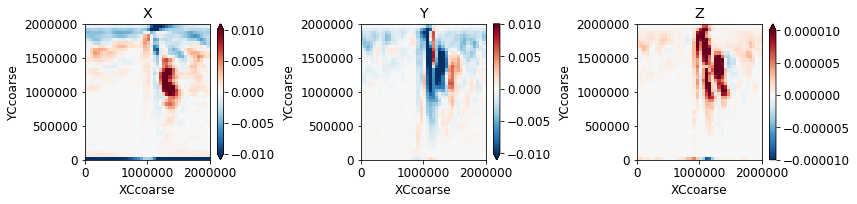

In [64]:
plt.figure(figsize=(12,3))

plt.subplot(131)
Fb_para_x.sel(Z=-1000, method='nearest').plot(vmin=-1e-2)
plt.title('X')

plt.subplot(132)
Fb_para_y.sel(Z=-1000, method='nearest').plot(vmin=-1e-2)
plt.title('Y')

plt.subplot(133)
Fb_para_z.sel(Z=-1000, method='nearest').plot(vmin=-1e-5)
plt.title('Z')
plt.tight_layout()

### divergence of the fields

In [73]:
from xgcm import Grid, generate_grid_ds

In [74]:
# define a grid for taking gradients on coarse grid
grid_ds = xr.Dataset()
grid_ds['TRAC01'] = Trac_coarse['TRAC01']
grid_ds['wVeltave'] = Model_Tav['wVeltave']
grid_ds = grid_ds.drop(['wVeltave','XC','YC']).isel(XC=0, YC=0)
ds = generate_grid_ds(grid_ds, {'X': 'XCcoarse', 'Y':'YCcoarse'})
grid = Grid(ds, periodic='X')

In [83]:
def divergence(flux, grid, Lcoarse):
    
    div = grid.interp(grid.diff(flux.UpCp, 'X')/Lcoarse, 'X') + \
              grid.interp(grid.diff(flux.VpCp, 'Y', boundary='extend')/Lcoarse, 'Y', boundary='extend') + \
             -grid.interp(grid.diff(flux.WpCp, 'Z', boundary='extend'), 'Z', boundary='extend')/ flux.drF
                
    return div           

In [84]:
Fb_para_div = divergence(Fb_para, grid, Lcoarse)
Fb_perp_div = divergence(Fb_perp, grid, Lcoarse)

In [85]:
## one of the figures for the paper 
X = T_coarse.XCcoarse/1e3
Y = T_coarse.YCcoarse/1e3
Z = T_coarse.Z

In [97]:
import matplotlib.ticker                         # here's where the formatter is
cbformat = matplotlib.ticker.ScalarFormatter()   # create the formatter
cbformat.set_powerlimits((-1,1))                 # set the limits for sci. not.

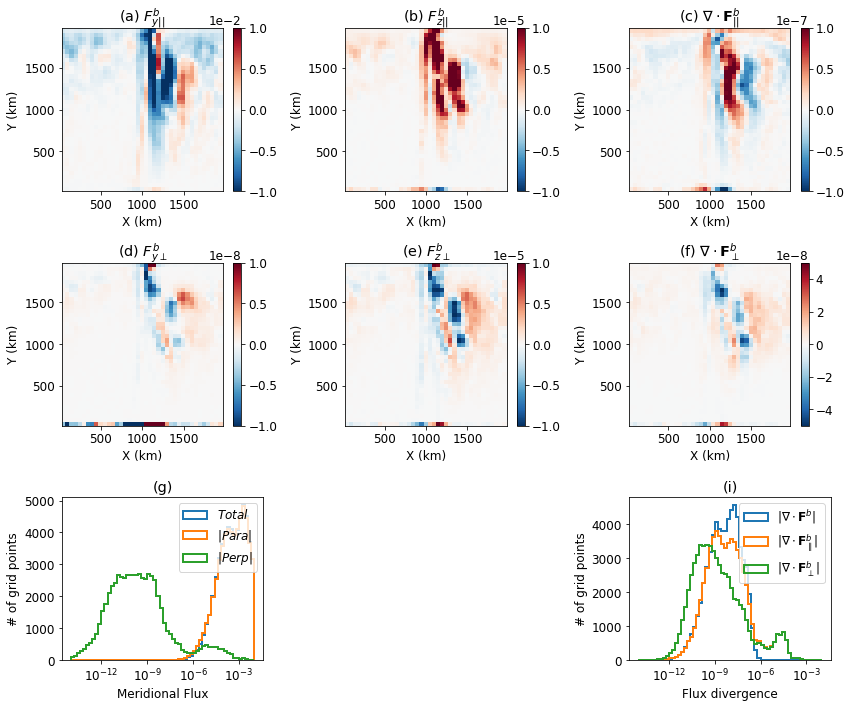

In [112]:

plt.figure(figsize=(12,10))

plt.subplot(331)
plt.pcolormesh(X, Y, Fb_para['VpCp'].sel(Z=-1000, method='nearest'), vmin=-1e-2, vmax=1e-2, cmap='RdBu_r')
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.colorbar( format=cbformat)
plt.title(r'(a) $F^b_{y ||}$')

plt.subplot(332)
plt.pcolormesh(X, Y, Fb_para['WpCp'].sel(Z=-1000, method='nearest'), vmin=-1e-5, vmax=1e-5, cmap='RdBu_r')
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.colorbar( format=cbformat)
plt.title(r'(b) $F^b_{z ||}$')

plt.subplot(333)
plt.pcolormesh(X, Y, Fb_para_div.sel(Z=-1000, method='nearest'), vmin=-1e-7, vmax=1e-7, cmap='RdBu_r')
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.colorbar()
plt.title(r'(c) $\nabla \cdot \mathbf{F}^b_{||}$')

plt.subplot(334)
plt.pcolormesh(X, Y, Fb_perp['VpCp'].sel(Z=-1000, method='nearest'), vmin=-1e-8, vmax=1e-8, cmap='RdBu_r')
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.colorbar()
plt.title(r'(d) $F^b_{y \perp}$')

plt.subplot(335)
plt.pcolormesh(X, Y, Fb_perp['WpCp'].sel(Z=-1000, method='nearest'), vmin=-1e-5, vmax=1e-5, cmap='RdBu_r')
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.colorbar( format=cbformat)
plt.title(r'(e) $F^b_{z \perp}$')

plt.subplot(336)
plt.pcolormesh(X, Y, Fb_perp_div.sel(Z=-1000, method='nearest'), vmin=-5e-8, vmax=5e-8, cmap='RdBu_r')
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.colorbar()
plt.title(r'(f) $\nabla \cdot \mathbf{F}^b_{\perp}$')

### histogram figures
logbins = np.logspace(-14, -2, 61)
plt.subplot(337)
[_,_,_] = np.abs(Fb_perp['VpCp'] + Fb_para['VpCp']).plot.hist(bins=logbins,histtype='step', linewidth=2, label=r'Total')
[_,_,_] = np.abs(Fb_para['VpCp']).plot.hist(bins=logbins, histtype='step',linewidth=2,  label=r'$Para')
[_,_,_] = np.abs(Fb_perp['VpCp']).plot.hist(bins=logbins, histtype='step',linewidth=2,  label=r'$Perp')
plt.xscale('log')
plt.legend()
plt.ylabel('# of grid points')
plt.xlabel(r'$|F^b_y|$')
plt.title(r'(g)')


plt.subplot(339)
[_,_,_] = np.abs(Fb_perp_div + Fb_para_div).plot.hist(bins=logbins,histtype='step', linewidth=2, label=r'$|\nabla \cdot \mathbf{F}^b|$')
[_,_,_] = np.abs(Fb_para_div).plot.hist(bins=logbins, histtype='step',linewidth=2,  label=r'$|\nabla \cdot \mathbf{F}^b_{\parallel}|$')
[_,_,_] = np.abs(Fb_perp_div).plot.hist(bins=logbins, histtype='step',linewidth=2,  label=r'$|\nabla \cdot \mathbf{F}^b_{\perp}|$')
plt.xscale('log')
plt.legend()
plt.ylabel('# of grid points')
plt.xlabel('Flux divergence')
plt.title(r'(i)')

plt.tight_layout()

### Separation of diffusivity tensor into two components

The above analysis is dependent on the tracer! For each tracer the vectors of along and across mean tracer surfaces will be very different. We would like to have a unified parameter set, which is tracer independent (we don't want a seprate parameterization) for each individual tracer. 

This is perfectly possible in GLM. However, GLM can't be applied practically. Also, it gives us the evolution equation for the lagrangian mean tracer concentration. This second concern is less of an issue, considering that the correct interpretation of GM is that it works on a modified mean (and not eulerian mean). 

An approximation can be done in Eulerian world (which formally comes from small amplitude wave approximation of GLM/or homogenization) that expresses the tracer eddy fluxes as a diffusivity tensor times the mean gradient. Many tracers can be used to diagnose the best fit tensor. Our work shows that this tensor is able to reproduce tracer fluxes even for unknown/new tracers with decent accuracy. However, being an approximation you lose some of the theoretical perfection, which will be discussed later. 

The idea is quite simple: 

\begin{equation}
\mathbf{F}_c = - \mathbf{K} \nabla C = - (\mathbf{A + S}) \nabla C
\end{equation}
for any tracer. 

The split into the antisymmetric and symmetric parts allows looks similar to the break down into along and across mean gradient. This is because the flux due to the antisymmetric part is skew to the gradient (similar to the along fluxes in previous section), and the symmetric part is what enters the variance equation. However, it is not the same thing, there are number of subtle differences, which will be discussed later. The main reason for the difference is that K is tracer independent. 

In [40]:
from funcs import *

In [41]:
list_trac = ['TRAC01', 'TRAC02', 'TRAC03', 'TRAC04', 'TRAC05', 
            'TRAC06', 'TRAC07', 'TRAC08', 'TRAC09', 'TRAC10', 
            'TRAC11', 'TRAC12', 'TRAC13', 'TRAC14', 'TRAC15', 
            'TRAC16', 'TRAC17', 'TRAC18', 'TRAC19', 'TRAC20']

In [42]:
[UpCp, VpCp, WpCp] = get_flux_arrays(Trac_coarse, list_trac)
[UdagCdag, VdagCdag, WdagCdag] = get_stationary_flux_arrays(Trac_coarse, Vels_coarse, list_trac)
[dCdx, dCdy, dCdz]= get_grad_arrays(Trac_coarse, list_trac)

In [43]:
fluxT = xr.Dataset({'UpCp':T_coarse.UpTp, 'VpCp':T_coarse.VpTp, 'WpCp':T_coarse.WpTp})
gradT = xr.Dataset({'dCdx':T_coarse.T_X, 'dCdy':T_coarse.T_Y, 'dCdz':T_coarse.T_Z})

In [44]:
# the standing flux for temp
Udagger = Vels_coarse.U - Vels_coarse.U.mean('XCcoarse')
Vdagger = Vels_coarse.V - Vels_coarse.V.mean('XCcoarse')
Wdagger = Vels_coarse.W - Vels_coarse.W.mean('XCcoarse')

Tdagger = T_coarse['T'] - T_coarse['T'].mean('XCcoarse')
# U'C'
UdagTdag = Tdagger*Udagger
VdagTdag = Tdagger*Vdagger
WdagTdag = Tdagger*Wdagger
fluxT_stat = xr.Dataset({'UdagCdag':UdagTdag, 'VdagCdag':VdagTdag, 'WdagCdag':WdagTdag})

In [45]:
flux = xr.Dataset({'UpCp':UpCp, 'VpCp':VpCp, 'WpCp':WpCp})
grads = xr.Dataset({'dCdx':dCdx, 'dCdy':dCdy, 'dCdz':dCdz})

In [46]:
def flux_reconstruct(tensor, flux, grads):

    recUflux = -(tensor.sel(i=0, j=0)*grads.dCdx + tensor.sel(i=0, j=1)*grads.dCdy + tensor.sel(i=0, j=2)*grads.dCdz)
    recVflux = -(tensor.sel(i=1, j=0)*grads.dCdx + tensor.sel(i=1, j=1)*grads.dCdy + tensor.sel(i=1, j=2)*grads.dCdz)
    recWflux = -(tensor.sel(i=2, j=0)*grads.dCdx + tensor.sel(i=2, j=1)*grads.dCdy + tensor.sel(i=2, j=2)*grads.dCdz)

    errU = np.abs(flux.UpCp - recUflux)/np.abs(flux.UpCp)
    errV = np.abs(flux.VpCp - recVflux)/np.abs(flux.VpCp)
    errW = np.abs(flux.WpCp - recWflux)/np.abs(flux.WpCp)
    
    flux_rec=xr.Dataset({'UpCp':recUflux, 'VpCp':recVflux, 'WpCp':recWflux,
                                'errU':errU, 'errV':errV, 'errW':errW})
    
    return flux_rec

In [47]:
frb = flux_reconstruct(diff_tensor.Kcorr, fluxT, gradT)
frb_AT = flux_reconstruct(diff_tensor.ATcorr, fluxT, gradT) 
frb_ST = flux_reconstruct(diff_tensor.STcorr, fluxT, gradT) 

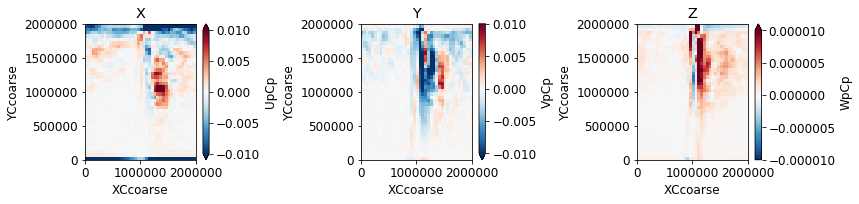

In [48]:
plt.figure(figsize=(12,3))

plt.subplot(131)
frb.UpCp.sel(Z=-1000, method='nearest').plot(vmin=-1e-2)
plt.title('X')

plt.subplot(132)
frb.VpCp.sel(Z=-1000, method='nearest').plot(vmin=-1e-2)
plt.title('Y')

plt.subplot(133)
frb.WpCp.sel(Z=-1000, method='nearest').plot(vmin=-1e-5)
plt.title('Z')
plt.tight_layout()

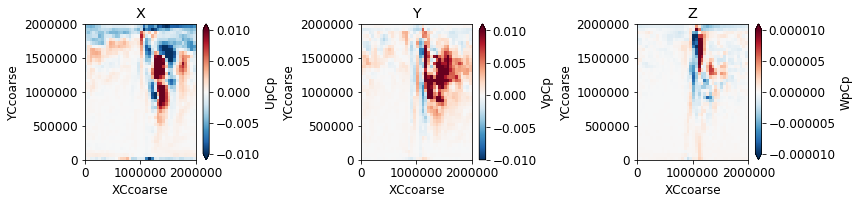

In [49]:
plt.figure(figsize=(12,3))

plt.subplot(131)
frb_ST.UpCp.sel(Z=-1000, method='nearest').plot(vmin=-1e-2)
plt.title('X')

plt.subplot(132)
frb_ST.VpCp.sel(Z=-1000, method='nearest').plot(vmin=-1e-2)
plt.title('Y')

plt.subplot(133)
frb_ST.WpCp.sel(Z=-1000, method='nearest').plot(vmin=-1e-5)
plt.title('Z')
plt.tight_layout()

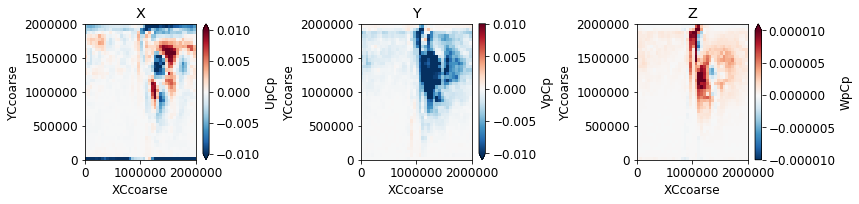

In [50]:
plt.figure(figsize=(12,3))

plt.subplot(131)
frb_AT.UpCp.sel(Z=-1000, method='nearest').plot(vmin=-1e-2)
plt.title('X')

plt.subplot(132)
frb_AT.VpCp.sel(Z=-1000, method='nearest').plot(vmin=-1e-2)
plt.title('Y')

plt.subplot(133)
frb_AT.WpCp.sel(Z=-1000, method='nearest').plot(vmin=-1e-5)
plt.title('Z')
plt.tight_layout()

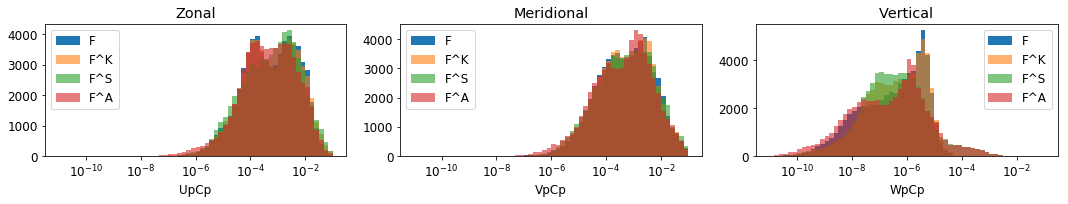

In [58]:
plt.figure(figsize=(15,3))

logbins = np.logspace(-11, -1, 61)

plt.subplot(131)
[_,_,_] = np.abs(fluxT.UpCp).plot.hist(bins=logbins, label='F')
[_,_,_] = np.abs(frb.UpCp).plot.hist(bins=logbins, alpha=0.6, label='F^K')
[_,_,_] = np.abs(frb_ST.UpCp).plot.hist(bins=logbins, alpha=0.6, label='F^S')
[_,_,_] = np.abs(frb_AT.UpCp).plot.hist(bins=logbins, alpha=0.6, label='F^A')
plt.xscale('log')
plt.legend()
plt.title('Zonal')

plt.subplot(132)
[_,_,_] = np.abs(fluxT.VpCp).plot.hist(bins=logbins, label='F')
[_,_,_] = np.abs(frb.VpCp).plot.hist(bins=logbins, alpha=0.6, label='F^K')
[_,_,_] = np.abs(frb_ST.VpCp).plot.hist(bins=logbins, alpha=0.6, label='F^S')
[_,_,_] = np.abs(frb_AT.VpCp).plot.hist(bins=logbins, alpha=0.6, label='F^A')
plt.xscale('log')
plt.legend()
plt.title('Meridional')

plt.subplot(133)
[_,_,_] = np.abs(fluxT.WpCp).plot.hist(bins=logbins, label='F')
[_,_,_] = np.abs(frb.WpCp).plot.hist(bins=logbins, alpha=0.6, label='F^K')
[_,_,_] = np.abs(frb_ST.WpCp).plot.hist(bins=logbins, alpha=0.6, label='F^S')
[_,_,_] = np.abs(frb_AT.WpCp).plot.hist(bins=logbins, alpha=0.6, label='F^A')
plt.xscale('log')
plt.legend()
plt.title('Vertical')

plt.tight_layout()

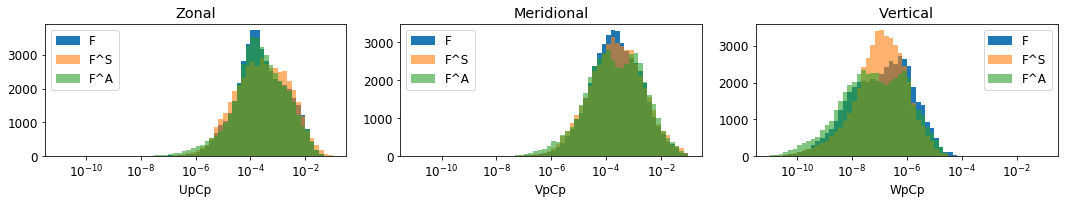

In [56]:
plt.figure(figsize=(15,3))

logbins = np.logspace(-11, -1, 61)

plt.subplot(131)
[_,_,_] = np.abs(fluxT.UpCp.sel(Z=slice(-200, -3000))).plot.hist(bins=logbins, label='F')
#[_,_,_] = np.abs(frb.UpCp.sel(Z=slice(-200, -3000))).plot.hist(bins=logbins, alpha=0.6, label='F^K')
[_,_,_] = np.abs(frb_ST.UpCp.sel(Z=slice(-200, -3000))).plot.hist(bins=logbins, alpha=0.6, label='F^S')
[_,_,_] = np.abs(frb_AT.UpCp.sel(Z=slice(-200, -3000))).plot.hist(bins=logbins, alpha=0.6, label='F^A')
plt.xscale('log')
plt.legend()
plt.title('Zonal')

plt.subplot(132)
[_,_,_] = np.abs(fluxT.VpCp.sel(Z=slice(-200, -3000))).plot.hist(bins=logbins, label='F')
#[_,_,_] = np.abs(frb.VpCp.sel(Z=slice(-200, -3000))).plot.hist(bins=logbins, alpha=0.6, label='F^K')
[_,_,_] = np.abs(frb_ST.VpCp.sel(Z=slice(-200, -3000))).plot.hist(bins=logbins, alpha=0.6, label='F^S')
[_,_,_] = np.abs(frb_AT.VpCp.sel(Z=slice(-200, -3000))).plot.hist(bins=logbins, alpha=0.6, label='F^A')
plt.xscale('log')
plt.legend()
plt.title('Meridional')

plt.subplot(133)
[_,_,_] = np.abs(fluxT.WpCp.sel(Z=slice(-200, -3000))).plot.hist(bins=logbins, label='F')
#[_,_,_] = np.abs(frb.WpCp.sel(Z=slice(-200, -3000))).plot.hist(bins=logbins, alpha=0.6, label='F^K')
[_,_,_] = np.abs(frb_ST.WpCp.sel(Z=slice(-200, -3000))).plot.hist(bins=logbins, alpha=0.6, label='F^S')
[_,_,_] = np.abs(frb_AT.WpCp.sel(Z=slice(-200, -3000))).plot.hist(bins=logbins, alpha=0.6, label='F^A')
plt.xscale('log')
plt.legend()
plt.title('Vertical')

plt.tight_layout()

In [37]:
frb_AT_mod = (frb_AT.UpCp**2 + frb_AT.VpCp**2 + frb_AT.WpCp**2)**0.5
frb_ST_mod = (frb_ST.UpCp**2 + frb_ST.VpCp**2 + frb_ST.WpCp**2)**0.5

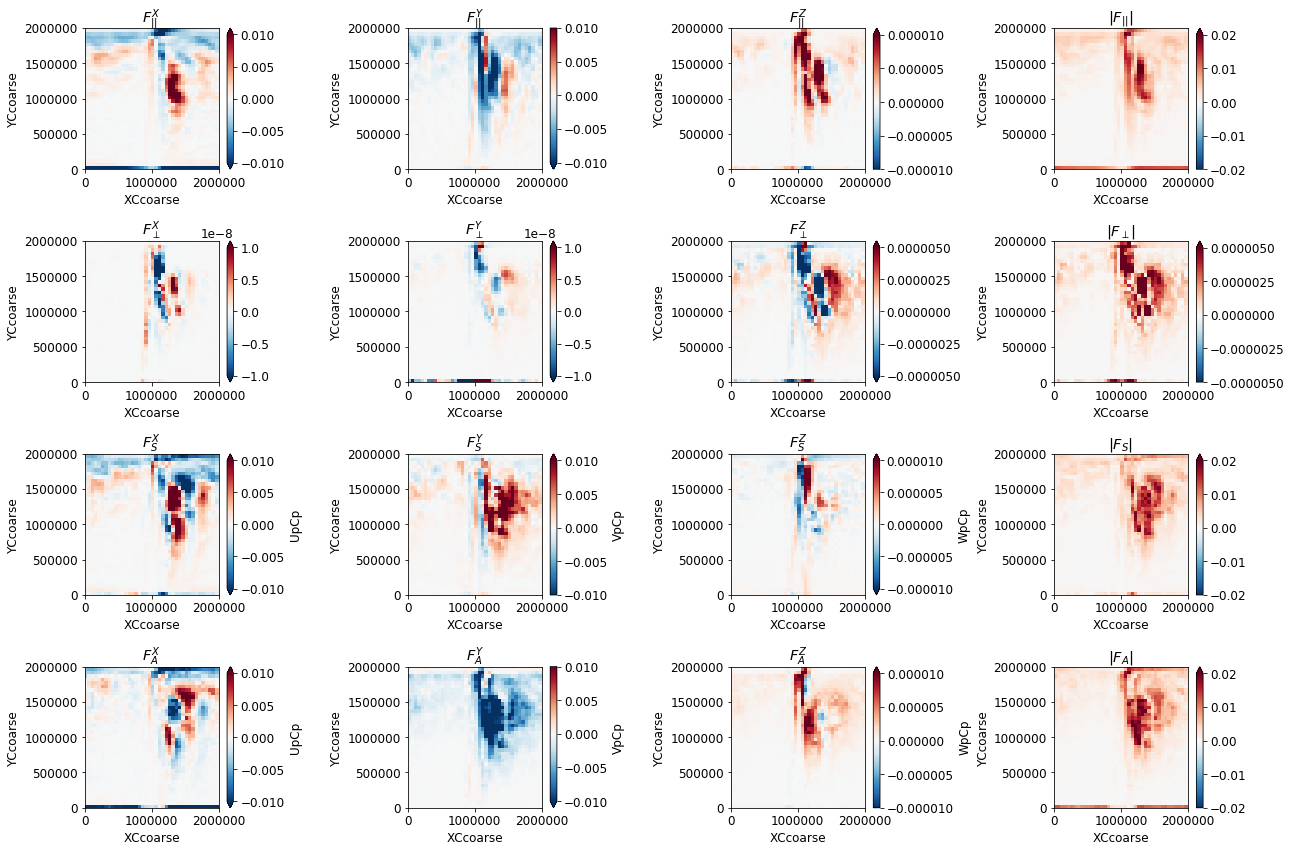

In [55]:
plt.figure(figsize=(18,12))

plt.subplot(4,4,1)
Fb_para_x.sel(Z=-1000, method='nearest').plot(vmin=-1e-2)
plt.title('$F_{||}^X$')

plt.subplot(4,4,2)
Fb_para_y.sel(Z=-1000, method='nearest').plot(vmin=-1e-2)
plt.title('$F_{||}^Y$')

plt.subplot(4,4,3)
Fb_para_z.sel(Z=-1000, method='nearest').plot(vmin=-1e-5)
plt.title('$F_{||}^Z$')

plt.subplot(4,4,4)
Fb_para_mod.sel(Z=-1000, method='nearest').plot(vmin=-2e-2)
plt.title('$|F_{||}|$')

plt.subplot(4,4,5)
Fb_perp_x.sel(Z=-1000, method='nearest').plot(vmin=-1e-8)
plt.title('$F_\perp^X$')

plt.subplot(4,4,6)
Fb_perp_y.sel(Z=-1000, method='nearest').plot(vmin=-1e-8)
plt.title('$F_\perp^Y$')

plt.subplot(4,4,7)
Fb_perp_z.sel(Z=-1000, method='nearest').plot(vmin=-5e-6)
plt.title('$F_\perp^Z$')

plt.subplot(4,4,8)
((Fb_perp_mod**2)**0.5).sel(Z=-1000, method='nearest').plot(vmin=-5e-6)
plt.title('$|F_\perp|$')

plt.subplot(4,4,9)
frb_ST.UpCp.sel(Z=-1000, method='nearest').plot(vmin=-1e-2)
plt.title('$F_S^X$')

plt.subplot(4,4,10)
frb_ST.VpCp.sel(Z=-1000, method='nearest').plot(vmin=-1e-2)
plt.title('$F_S^Y$')

plt.subplot(4,4,11)
frb_ST.WpCp.sel(Z=-1000, method='nearest').plot(vmin=-1e-5)
plt.title('$F_S^Z$')

plt.subplot(4,4,12)
frb_ST_mod.sel(Z=-1000, method='nearest').plot(vmin=-2e-2)
plt.title('$|F_S|$')

plt.subplot(4,4,13)
frb_AT.UpCp.sel(Z=-1000, method='nearest').plot(vmin=-1e-2)
plt.title('$F_A^X$')

plt.subplot(4,4,14)
frb_AT.VpCp.sel(Z=-1000, method='nearest').plot(vmin=-1e-2)
plt.title('$F_A^Y$')

plt.subplot(4,4,15)
frb_AT.WpCp.sel(Z=-1000, method='nearest').plot(vmin=-1e-5)
plt.title('$F_A^Z$')

plt.subplot(4,4,16)
frb_AT_mod.sel(Z=-1000, method='nearest').plot(vmin=-2e-2)
plt.title('$|F_A|$')


plt.tight_layout()

plt.savefig('para_perp_AS_decompose.pdf')

NameError: name 'frb_stat' is not defined

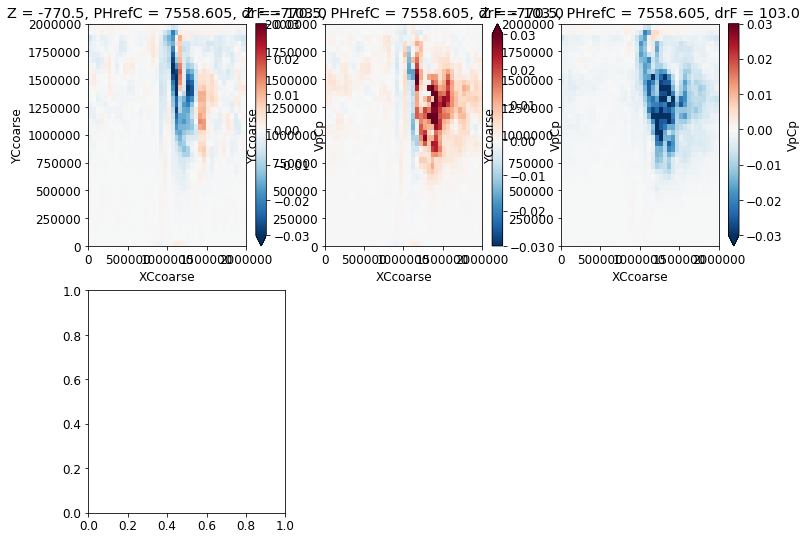

In [20]:
plt.figure(figsize=(12,9))

plt.subplot(231)
frb.VpCp.sel(Z=-800, method='nearest').plot(vmin=-0.03)

plt.subplot(232)
frb_ST.VpCp.sel(Z=-800, method='nearest').plot(vmin=-0.03)

plt.subplot(233)
frb_AT.VpCp.sel(Z=-800, method='nearest').plot(vmin=-0.03)

plt.subplot(234)
frb_stat.VpCp.sel(Z=-800, method='nearest').plot(vmin=-0.3)

plt.subplot(235)
frb_ST_stat.VpCp.sel(Z=-800, method='nearest').plot(vmin=-0.3)

plt.subplot(236)
frb_AT_stat.VpCp.sel(Z=-800, method='nearest').plot(vmin=-0.1)

plt.tight_layout()

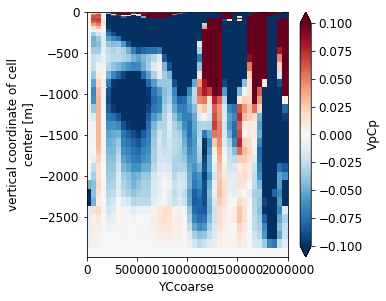

In [26]:

frb_ST_stat.VpCp.mean('XCcoarse').plot(vmin=-0.1)


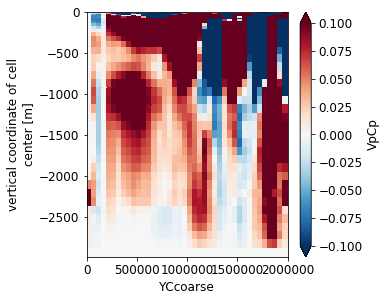

In [27]:
frb_AT_stat.VpCp.mean('XCcoarse').plot(vmin=-0.1)

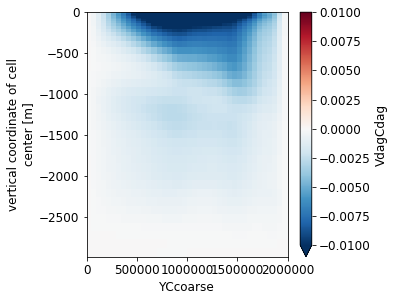

In [40]:
fluxT_stat.VdagCdag.mean('XCcoarse').plot(vmin=-0.01)

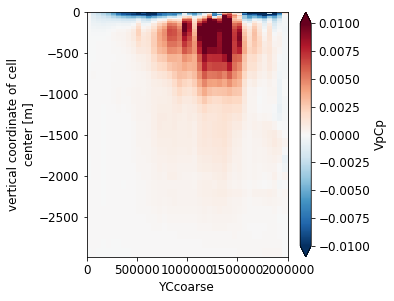

In [35]:
frb_ST.VpCp.mean('XCcoarse').plot(vmin=-0.01)

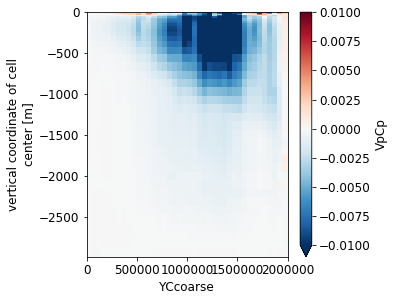

In [36]:
frb_AT.VpCp.mean('XCcoarse').plot(vmin=-0.01)

In [16]:
Xcoarse = T_coarse.XCcoarse.data
Ycoarse = T_coarse.YCcoarse.data
Z = T_coarse.Z.data

Ypcol = np.append(Ycoarse, Ycoarse[-1]+Lcoarse)-Lcoarse/2
Xpcol = np.append(Xcoarse, Xcoarse[-1]+Lcoarse)-Lcoarse/2
Zpcol = np.append(Z, Z[-1])

In [41]:
# Put these fluxes in parallel and perp form 

def flux_para_perp(fluxC, gradC):
    
    gradmod = (gradC.dCdx**2 + gradC.dCdy**2 + gradC.dCdz**2)**0.5
    F_perp_mod = (fluxC.UpCp*gradC.dCdx + fluxC.VpCp*gradC.dCdy + fluxC.WpCp*gradC.dCdz) / gradmod
    
    F_perp_x = F_perp_mod*gradC.dCdx / gradmod
    F_perp_y = F_perp_mod*gradC.dCdy / gradmod
    F_perp_z = F_perp_mod*gradC.dCdz / gradmod
    
    F_para_x = fluxC.UpCp - F_perp_x
    F_para_y = fluxC.VpCp - F_perp_y
    F_para_z = fluxC.WpCp - F_perp_z
    
    flux_split =xr.Dataset({'UpCp' : fluxC.UpCp, 'VpCp' : fluxC.VpCp, 'WpCp' : fluxC.WpCp,
                            'F_perp_x':F_perp_x, 'F_perp_y':F_perp_y, 'F_perp_z':F_perp_z,
                            'F_para_x':F_para_x, 'F_para_y':F_para_y, 'F_para_z':F_para_z})
    return flux_split

In [42]:
frb_split = flux_para_perp(frb, gradT)
frb_AT_split = flux_para_perp(frb_AT, gradT)
frb_ST_split = flux_para_perp(frb_ST, gradT)

/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


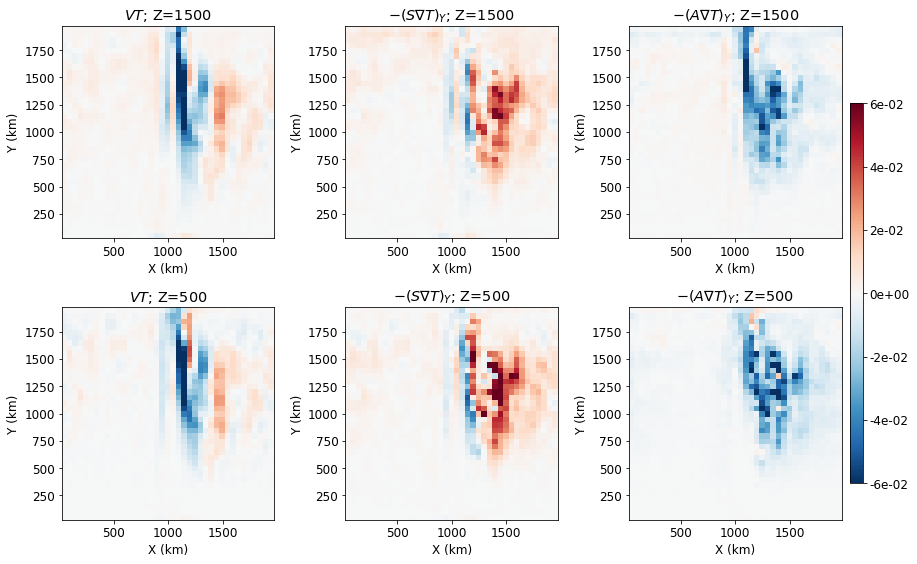

In [33]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8))

ax[0,0].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, T_coarse.VpTp.sel(Z=-1500, method='nearest'), vmin=-0.01, vmax=0.01, cmap='RdBu_r')
ax[0,0].set_title(r'$VT$; Z=1500')
ax[0,0].set_xlabel('X (km)')
ax[0,0].set_ylabel('Y (km)')

ax[0,1].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, flux_rec_buoy_ST.VpCp.sel(Z=-1500, method='nearest'), vmin=-0.01, vmax=0.01, cmap='RdBu_r')
ax[0,1].set_title(r'$-(S \nabla T)_Y$; Z=1500')
ax[0,1].set_xlabel('X (km)')
ax[0,1].set_ylabel('Y (km)')

ax[0,2].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, flux_rec_buoy_AT.VpCp.sel(Z=-1500, method='nearest'), vmin=-0.01, vmax=0.01, cmap='RdBu_r')
ax[0,2].set_title(r'$-(A \nabla T)_Y$; Z=1500')
ax[0,2].set_xlabel('X (km)')
ax[0,2].set_ylabel('Y (km)')

ax[1,0].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, T_coarse.VpTp.sel(Z=-500, method='nearest'), vmin=-0.06, vmax=0.06, cmap='RdBu_r')
ax[1,0].set_title(r'$VT$; Z=500')
ax[1,0].set_xlabel('X (km)')
ax[1,0].set_ylabel('Y (km)')

ax[1,1].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, flux_rec_buoy_ST.VpCp.sel(Z=-500, method='nearest'), vmin=-0.06, vmax=0.06, cmap='RdBu_r')
ax[1,1].set_title(r'$-(S \nabla T)_Y$; Z=500')
ax[1,1].set_xlabel('X (km)')
ax[1,1].set_ylabel('Y (km)')

im=ax[1,2].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, flux_rec_buoy_AT.VpCp.sel(Z=-500, method='nearest'), vmin=-0.06, vmax=0.06, cmap='RdBu_r')
ax[1,2].set_title(r'$-(A \nabla T)_Y$; Z=500')
ax[1,2].set_xlabel('X (km)')
ax[1,2].set_ylabel('Y (km)')
cbar_ax = fig.add_axes([0.99, 0.15, 0.015, 0.66])
fig.colorbar(im, cax=cbar_ax,format='%.0e')


plt.tight_layout()
plt.savefig('3D_Tflux.pdf')

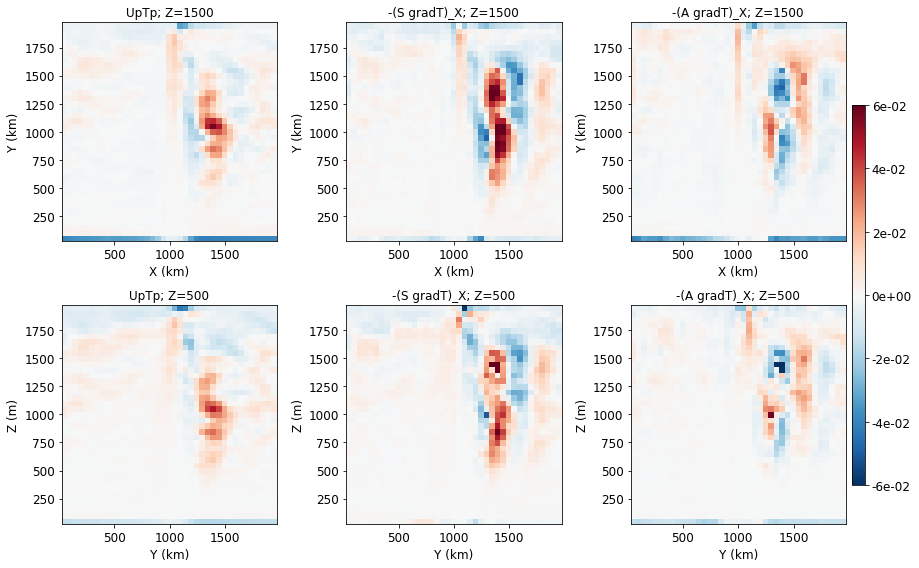

In [96]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8))

ax[0,0].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, T_coarse.UpTp.sel(Z=-1500, method='nearest'), vmin=-0.01, vmax=0.01, cmap='RdBu_r')
ax[0,0].set_title('UpTp; Z=1500')
ax[0,0].set_xlabel('X (km)')
ax[0,0].set_ylabel('Y (km)')

ax[0,1].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, flux_rec_buoy_ST.UpCp.sel(Z=-1500, method='nearest'), vmin=-0.01, vmax=0.01, cmap='RdBu_r')
ax[0,1].set_title('-(S gradT)_X; Z=1500')
ax[0,1].set_xlabel('X (km)')
ax[0,1].set_ylabel('Y (km)')

ax[0,2].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, flux_rec_buoy_AT.UpCp.sel(Z=-1500, method='nearest'), vmin=-0.01, vmax=0.01, cmap='RdBu_r')
ax[0,2].set_title('-(A gradT)_X; Z=1500')
ax[0,2].set_xlabel('X (km)')
ax[0,2].set_ylabel('Y (km)')

ax[1,0].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, T_coarse.UpTp.sel(Z=-500, method='nearest'), vmin=-0.06, vmax=0.06, cmap='RdBu_r')
ax[1,0].set_title('UpTp; Z=500')
ax[1,0].set_xlabel('Y (km)')
ax[1,0].set_ylabel('Z (m)')

ax[1,1].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, flux_rec_buoy_ST.UpCp.sel(Z=-500, method='nearest'), vmin=-0.06, vmax=0.06, cmap='RdBu_r')
ax[1,1].set_title('-(S gradT)_X; Z=500')
ax[1,1].set_xlabel('Y (km)')
ax[1,1].set_ylabel('Z (m)')

im=ax[1,2].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, flux_rec_buoy_AT.UpCp.sel(Z=-500, method='nearest'), vmin=-0.06, vmax=0.06, cmap='RdBu_r')
ax[1,2].set_title('-(A gradT)_X; Z=500')
ax[1,2].set_xlabel('Y (km)')
ax[1,2].set_ylabel('Z (m)')
cbar_ax = fig.add_axes([0.99, 0.15, 0.015, 0.66])
fig.colorbar(im, cax=cbar_ax,format='%.0e')

plt.tight_layout()

In [51]:
frb_AT_split

<xarray.Dataset>
Dimensions:      (XCcoarse: 40, YCcoarse: 40, Z: 40)
Coordinates:
  * Z            (Z) float32 -5.0 -15.0 -25.0 -36.0 ... -2727.5 -2830.5 -2933.5
  * YCcoarse     (YCcoarse) float32 25000.0 75000.0 ... 1925000.0 1975000.0
  * XCcoarse     (XCcoarse) float32 25000.0 75000.0 ... 1925000.0 1975000.0
    hFacCcoarse  (Z, YCcoarse, XCcoarse) float32 0.9 0.9 0.9 0.9 ... 1.0 1.0 1.0
    PHrefC       (Z) float32 49.05 147.15 245.25 ... 27767.205 28777.635
    drF          (Z) float32 10.0 10.0 10.0 12.0 ... 103.0 103.0 103.0 103.0
Data variables:
    UpCp         (Z, YCcoarse, XCcoarse) float32 -0.022844225 ... 0.00014541797
    VpCp         (Z, YCcoarse, XCcoarse) float32 0.0008544839 ... -3.1480336e-05
    WpCp         (Z, YCcoarse, XCcoarse) float32 -1.0991694e-06 ... -2.1978055e-08
    F_perp_x     (Z, YCcoarse, XCcoarse) float32 -1.7590891e-07 ... 1.8917569e-06
    F_perp_y     (Z, YCcoarse, XCcoarse) float32 -0.00043040264 ... -1.6477763e-05
    F_perp_z     (Z, YCcoarse

/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


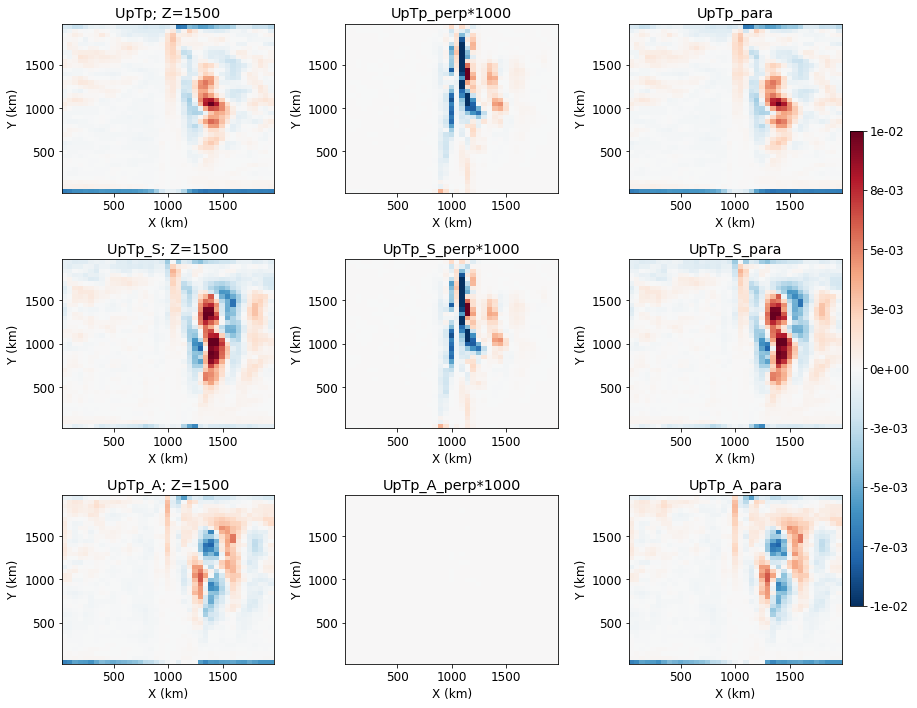

In [68]:
fig, ax = plt.subplots(3, 3, figsize=(12, 10))


ax[0,0].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, frb_split.UpCp.sel(Z=-1500, method='nearest'), vmin=-0.01, vmax=0.01, cmap='RdBu_r')
ax[0,0].set_title('UpTp; Z=1500')
ax[0,0].set_xlabel('X (km)')
ax[0,0].set_ylabel('Y (km)')

ax[0,1].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, frb_split.F_perp_x.sel(Z=-1500, method='nearest')*1e6, vmin=-0.01, vmax=0.01, cmap='RdBu_r')
ax[0,1].set_title('UpTp_perp*1000')
ax[0,1].set_xlabel('X (km)')
ax[0,1].set_ylabel('Y (km)')

ax[0,2].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, frb_split.F_para_x.sel(Z=-1500, method='nearest'), vmin=-0.01, vmax=0.01, cmap='RdBu_r')
ax[0,2].set_title('UpTp_para')
ax[0,2].set_xlabel('X (km)')
ax[0,2].set_ylabel('Y (km)')


ax[1,0].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, frb_ST_split.UpCp.sel(Z=-1500, method='nearest'), vmin=-0.01, vmax=0.01, cmap='RdBu_r')
ax[1,0].set_title('UpTp_S; Z=1500')
ax[1,0].set_xlabel('X (km)')
ax[1,0].set_ylabel('Y (km)')

ax[1,1].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, frb_ST_split.F_perp_x.sel(Z=-1500, method='nearest')*1e6, vmin=-0.01, vmax=0.01, cmap='RdBu_r')
ax[1,1].set_title('UpTp_S_perp*1000')
ax[1,1].set_xlabel('X (km)')
ax[1,1].set_ylabel('Y (km)')

ax[1,2].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, frb_ST_split.F_para_x.sel(Z=-1500, method='nearest'), vmin=-0.01, vmax=0.01, cmap='RdBu_r')
ax[1,2].set_title('UpTp_S_para')
ax[1,2].set_xlabel('X (km)')
ax[1,2].set_ylabel('Y (km)')


ax[2,0].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, frb_AT_split.UpCp.sel(Z=-1500, method='nearest'), vmin=-0.01, vmax=0.01, cmap='RdBu_r')
ax[2,0].set_title('UpTp_A; Z=1500')
ax[2,0].set_xlabel('X (km)')
ax[2,0].set_ylabel('Y (km)')

ax[2,1].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, frb_AT_split.F_perp_x.sel(Z=-1500, method='nearest')*1e6, vmin=-0.01, vmax=0.01, cmap='RdBu_r')
ax[2,1].set_title('UpTp_A_perp*1000')
ax[2,1].set_xlabel('X (km)')
ax[2,1].set_ylabel('Y (km)')

im = ax[2,2].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, frb_AT_split.F_para_x.sel(Z=-1500, method='nearest'), vmin=-0.01, vmax=0.01, cmap='RdBu_r')
ax[2,2].set_title('UpTp_A_para')
ax[2,2].set_xlabel('X (km)')
ax[2,2].set_ylabel('Y (km)')

cbar_ax = fig.add_axes([0.99, 0.15, 0.015, 0.66])
fig.colorbar(im, cax=cbar_ax,format='%.0e')

plt.tight_layout()

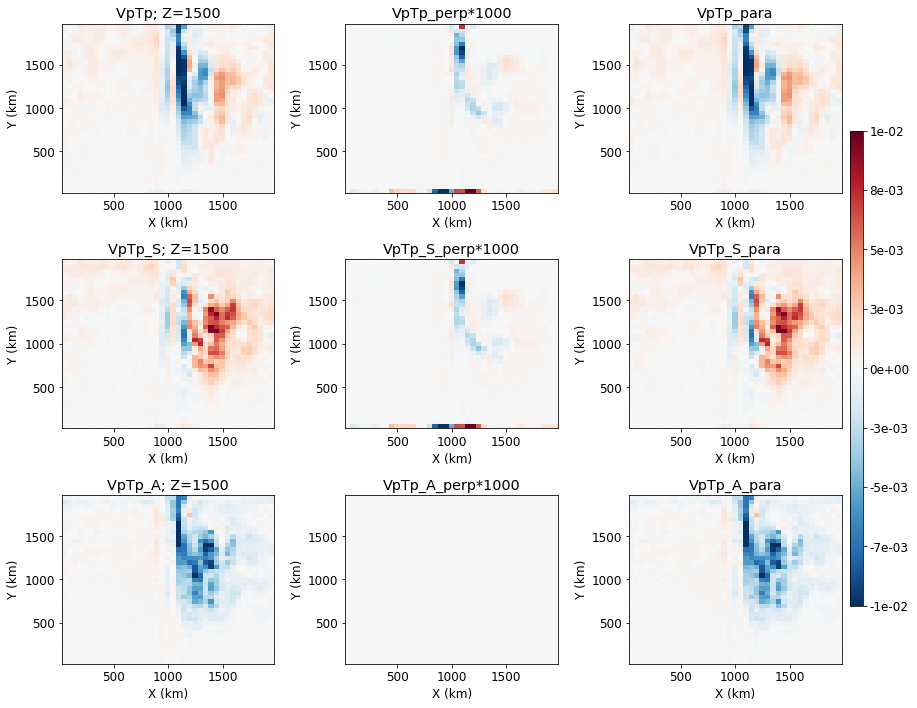

In [70]:
fig, ax = plt.subplots(3, 3, figsize=(12, 10))


ax[0,0].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, frb_split.VpCp.sel(Z=-1500, method='nearest'), vmin=-0.01, vmax=0.01, cmap='RdBu_r')
ax[0,0].set_title('VpTp; Z=1500')
ax[0,0].set_xlabel('X (km)')
ax[0,0].set_ylabel('Y (km)')

ax[0,1].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, frb_split.F_perp_y.sel(Z=-1500, method='nearest')*1e6, vmin=-0.01, vmax=0.01, cmap='RdBu_r')
ax[0,1].set_title('VpTp_perp*1000')
ax[0,1].set_xlabel('X (km)')
ax[0,1].set_ylabel('Y (km)')

ax[0,2].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, frb_split.F_para_y.sel(Z=-1500, method='nearest'), vmin=-0.01, vmax=0.01, cmap='RdBu_r')
ax[0,2].set_title('VpTp_para')
ax[0,2].set_xlabel('X (km)')
ax[0,2].set_ylabel('Y (km)')


ax[1,0].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, frb_ST_split.VpCp.sel(Z=-1500, method='nearest'), vmin=-0.01, vmax=0.01, cmap='RdBu_r')
ax[1,0].set_title('VpTp_S; Z=1500')
ax[1,0].set_xlabel('X (km)')
ax[1,0].set_ylabel('Y (km)')

ax[1,1].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, frb_ST_split.F_perp_y.sel(Z=-1500, method='nearest')*1e6, vmin=-0.01, vmax=0.01, cmap='RdBu_r')
ax[1,1].set_title('VpTp_S_perp*1000')
ax[1,1].set_xlabel('X (km)')
ax[1,1].set_ylabel('Y (km)')

ax[1,2].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, frb_ST_split.F_para_y.sel(Z=-1500, method='nearest'), vmin=-0.01, vmax=0.01, cmap='RdBu_r')
ax[1,2].set_title('VpTp_S_para')
ax[1,2].set_xlabel('X (km)')
ax[1,2].set_ylabel('Y (km)')


ax[2,0].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, frb_AT_split.VpCp.sel(Z=-1500, method='nearest'), vmin=-0.01, vmax=0.01, cmap='RdBu_r')
ax[2,0].set_title('VpTp_A; Z=1500')
ax[2,0].set_xlabel('X (km)')
ax[2,0].set_ylabel('Y (km)')

ax[2,1].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, frb_AT_split.F_perp_y.sel(Z=-1500, method='nearest')*1e6, vmin=-0.01, vmax=0.01, cmap='RdBu_r')
ax[2,1].set_title('VpTp_A_perp*1000')
ax[2,1].set_xlabel('X (km)')
ax[2,1].set_ylabel('Y (km)')

im = ax[2,2].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, frb_AT_split.F_para_y.sel(Z=-1500, method='nearest'), vmin=-0.01, vmax=0.01, cmap='RdBu_r')
ax[2,2].set_title('VpTp_A_para')
ax[2,2].set_xlabel('X (km)')
ax[2,2].set_ylabel('Y (km)')

cbar_ax = fig.add_axes([0.99, 0.15, 0.015, 0.66])
fig.colorbar(im, cax=cbar_ax,format='%.0e')

plt.tight_layout()

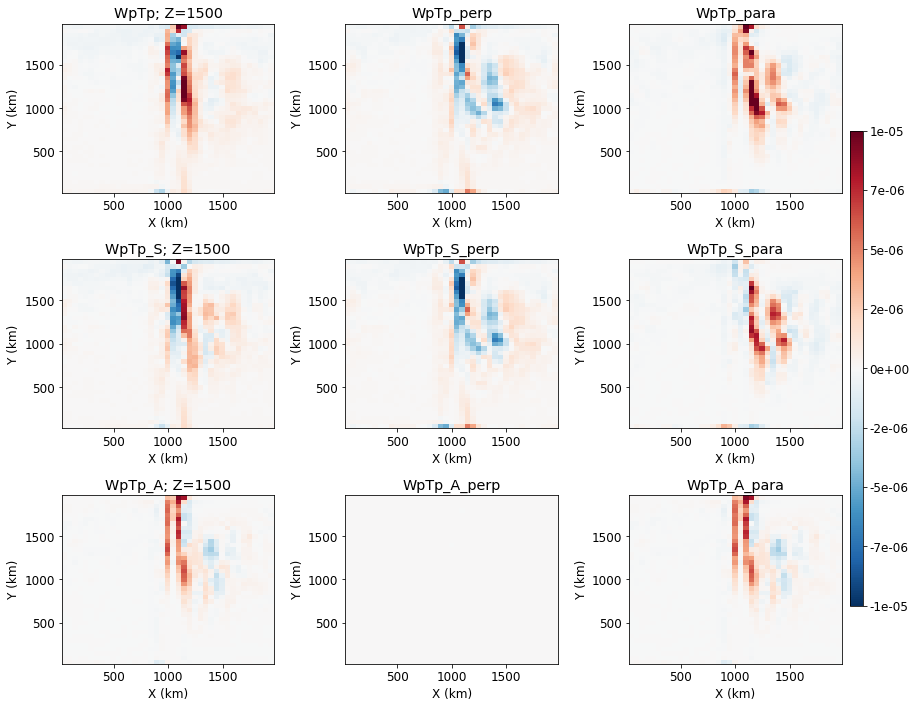

In [77]:
fig, ax = plt.subplots(3, 3, figsize=(12, 10))


ax[0,0].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, frb_split.WpCp.sel(Z=-1500, method='nearest'), vmin=-1e-5, vmax=1e-5, cmap='RdBu_r')
ax[0,0].set_title('WpTp; Z=1500')
ax[0,0].set_xlabel('X (km)')
ax[0,0].set_ylabel('Y (km)')

ax[0,1].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, frb_split.F_perp_z.sel(Z=-1500, method='nearest'), vmin=-1e-5, vmax=1e-5, cmap='RdBu_r')
ax[0,1].set_title('WpTp_perp')
ax[0,1].set_xlabel('X (km)')
ax[0,1].set_ylabel('Y (km)')

ax[0,2].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, frb_split.F_para_z.sel(Z=-1500, method='nearest'), vmin=-1e-5, vmax=1e-5, cmap='RdBu_r')
ax[0,2].set_title('WpTp_para')
ax[0,2].set_xlabel('X (km)')
ax[0,2].set_ylabel('Y (km)')


ax[1,0].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, frb_ST_split.WpCp.sel(Z=-1500, method='nearest'), vmin=-1e-5, vmax=1e-5, cmap='RdBu_r')
ax[1,0].set_title('WpTp_S; Z=1500')
ax[1,0].set_xlabel('X (km)')
ax[1,0].set_ylabel('Y (km)')

ax[1,1].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, frb_ST_split.F_perp_z.sel(Z=-1500, method='nearest'), vmin=-1e-5, vmax=1e-5, cmap='RdBu_r')
ax[1,1].set_title('WpTp_S_perp')
ax[1,1].set_xlabel('X (km)')
ax[1,1].set_ylabel('Y (km)')

ax[1,2].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, frb_ST_split.F_para_z.sel(Z=-1500, method='nearest'), vmin=-1e-5, vmax=1e-5, cmap='RdBu_r')
ax[1,2].set_title('WpTp_S_para')
ax[1,2].set_xlabel('X (km)')
ax[1,2].set_ylabel('Y (km)')


ax[2,0].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, frb_AT_split.WpCp.sel(Z=-1500, method='nearest'), vmin=-1e-5, vmax=1e-5, cmap='RdBu_r')
ax[2,0].set_title('WpTp_A; Z=1500')
ax[2,0].set_xlabel('X (km)')
ax[2,0].set_ylabel('Y (km)')

ax[2,1].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, frb_AT_split.F_perp_z.sel(Z=-1500, method='nearest'), vmin=-1e-5, vmax=1e-5, cmap='RdBu_r')
ax[2,1].set_title('WpTp_A_perp')
ax[2,1].set_xlabel('X (km)')
ax[2,1].set_ylabel('Y (km)')

im = ax[2,2].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, frb_AT_split.F_para_z.sel(Z=-1500, method='nearest'), vmin=-1e-5, vmax=1e-5, cmap='RdBu_r')
ax[2,2].set_title('WpTp_A_para')
ax[2,2].set_xlabel('X (km)')
ax[2,2].set_ylabel('Y (km)')

cbar_ax = fig.add_axes([0.99, 0.15, 0.015, 0.66])
fig.colorbar(im, cax=cbar_ax,format='%.0e')

plt.tight_layout()

In [44]:
FSparadotGradBh = frb_ST_split.F_para_x * T_coarse.T_X + frb_ST_split.F_para_y * T_coarse.T_Y
FAparadotGradBh = frb_AT_split.F_para_x * T_coarse.T_X + frb_AT_split.F_para_y * T_coarse.T_Y

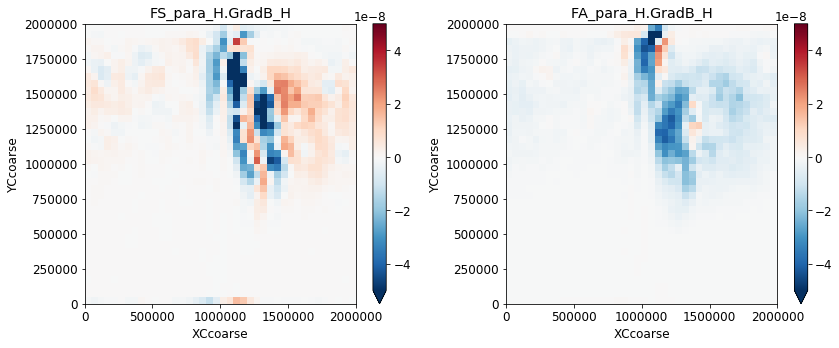

In [53]:
plt.figure(figsize=(12,5))
plt.subplot(121)
FSparadotGradBh.sel(Z=-800, method='nearest').plot(vmin = -5e-8)
plt.title('FS_para_H.GradB_H')

plt.subplot(122)
FAparadotGradBh.sel(Z=-800, method='nearest').plot(vmin = -5e-8)
plt.title('FA_para_H.GradB_H')
plt.tight_layout()

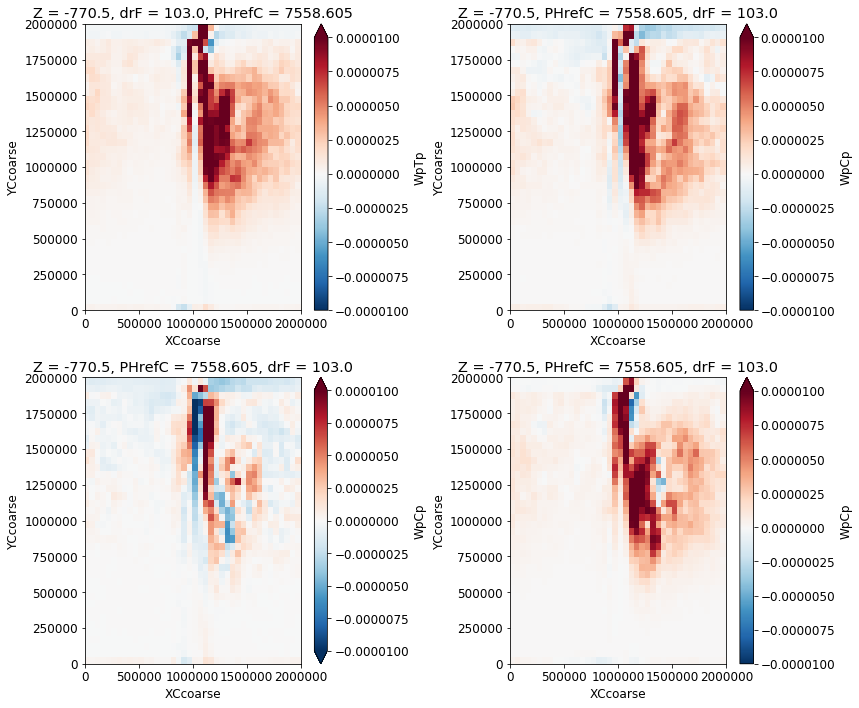

In [61]:
plt.figure(figsize=(12,10))

plt.subplot(221)
T_coarse.WpTp.sel(Z=-800, method='nearest').plot(vmin=-1e-5)

plt.subplot(222)
frb.WpCp.sel(Z=-800, method='nearest').plot(vmin=-1e-5)

plt.subplot(223)
frb_ST.WpCp.sel(Z=-800, method='nearest').plot(vmin=-1e-5)

plt.subplot(224)
frb_AT.WpCp.sel(Z=-800, method='nearest').plot(vmin=-1e-5)
plt.tight_layout()

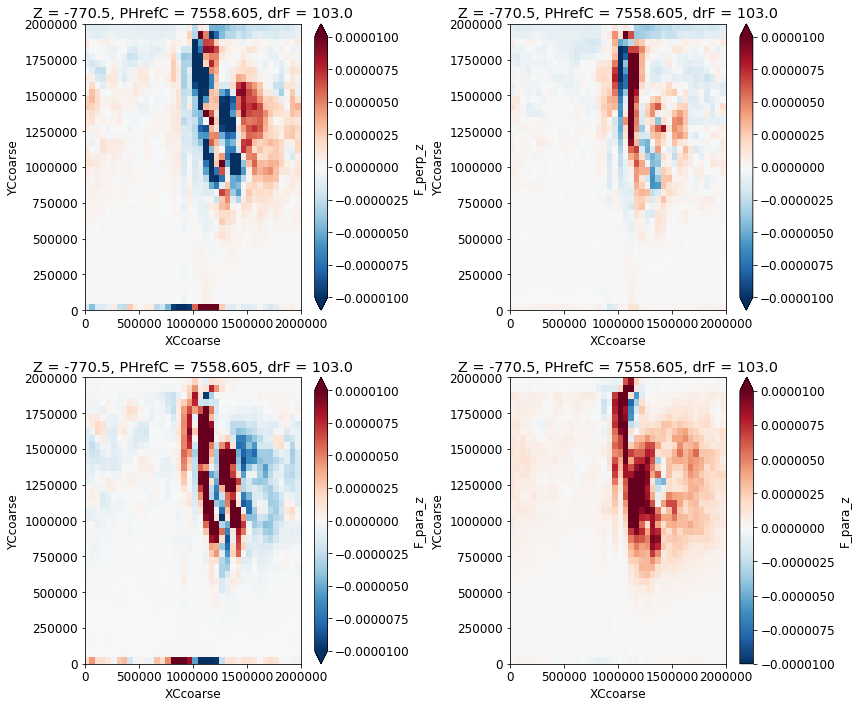

In [66]:
plt.figure(figsize=(12,10))

plt.subplot(221)
frb_ST_split.F_perp_z.sel(Z=-800, method='nearest').plot(vmin=-1e-5)

plt.subplot(222)
(frb_ST_split.F_perp_z + frb_ST_split.F_para_z).sel(Z=-800, method='nearest').plot(vmin=-1e-5)

plt.subplot(223)
frb_ST_split.F_para_z.sel(Z=-800, method='nearest').plot(vmin=-1e-5)

plt.subplot(224)
frb_AT_split.F_para_z.sel(Z=-800, method='nearest').plot(vmin=-1e-5)
plt.tight_layout()

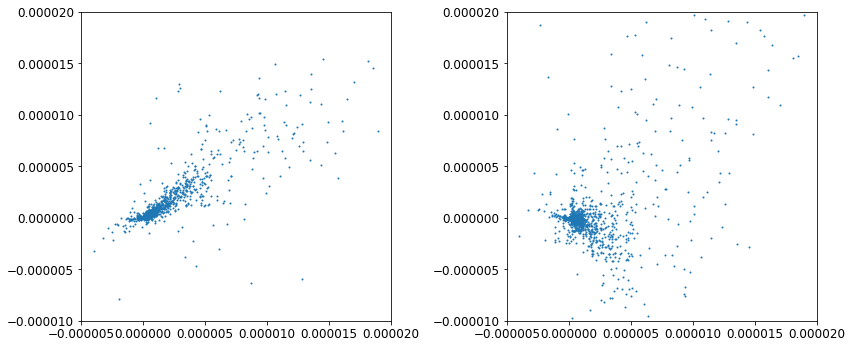

In [76]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.scatter ( T_coarse.WpTp.sel(Z=-800, method='nearest'),frb_AT_split.F_para_z.sel(Z=-800, method='nearest'),s=1)
plt.xlim([-0.05e-4, 0.2e-4])
plt.ylim([-0.1e-4, 0.2e-4])


plt.subplot(122)
plt.scatter ( T_coarse.WpTp.sel(Z=-800, method='nearest'),frb_ST_split.F_para_z.sel(Z=-800, method='nearest'), s=1)
plt.xlim([-0.05e-4, 0.2e-4])
plt.ylim([-0.1e-4, 0.2e-4])

plt.tight_layout()

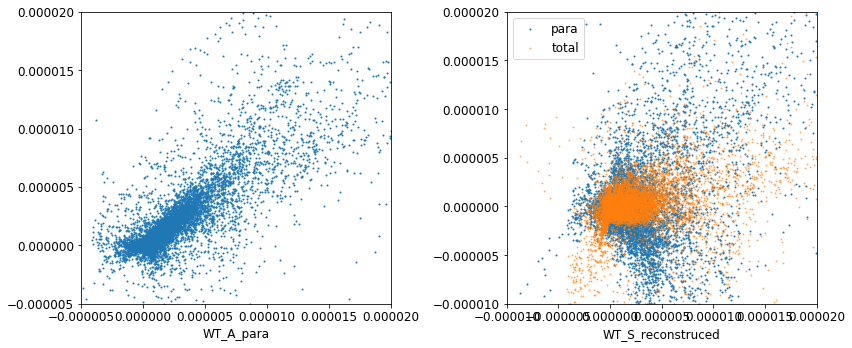

In [86]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.scatter ( T_coarse.WpTp.sel(Z=slice(-300,-1600)),frb_AT_split.F_para_z.sel(Z=slice(-300,-1600)),s=1)
plt.xlabel('WT_True')
plt.xlabel('WT_A_para')
plt.xlim([-0.05e-4, 0.2e-4])
plt.ylim([-0.05e-4, 0.2e-4])


plt.subplot(122)
plt.scatter ( T_coarse.WpTp.sel(Z=slice(-300,-1600)),frb_ST_split.F_para_z.sel(Z=slice(-300,-1600)), s=1, label='para')
plt.scatter ( T_coarse.WpTp.sel(Z=slice(-300,-1600)),frb_ST.WpCp.sel(Z=slice(-300,-1600)), s=1, label ='total', alpha=0.5)
plt.legend()
plt.xlabel('WT_True')
plt.xlabel('WT_S_reconstruced')
plt.xlim([-0.1e-4, 0.2e-4])
plt.ylim([-0.1e-4, 0.2e-4])

plt.tight_layout()

# Correlations between fields

In [110]:
def pearson_corr(ds1, ds2):
    corr = ((ds1 - ds1.mean())*(ds2 - ds2.mean())).mean() / ( ((ds1 - ds1.mean())**2).mean()**0.5 * ((ds2 - ds2.mean())**2).mean()**0.5 )
    return corr 

## Corr for VT
### Upstream

In [126]:
# V velocities
corr1 = pearson_corr(T_coarse.VpTp.sel(XCcoarse=slice(0, 800e3), Z=slice(-300,-1800)), 
                     frb.VpCp.sel(XCcoarse=slice(0, 800e3), Z=slice(-300,-1800)))
corr2 = pearson_corr(T_coarse.VpTp.sel(XCcoarse=slice(0, 800e3), Z=slice(-300,-1800)), 
                     frb_AT.VpCp.sel(XCcoarse=slice(0, 800e3), Z=slice(-300,-1800)))
corr3 = pearson_corr(T_coarse.VpTp.sel(XCcoarse=slice(0, 800e3), Z=slice(-300,-1800)), 
                     frb_ST.VpCp.sel(XCcoarse=slice(0, 800e3), Z=slice(-300,-1800)))
corr4 = pearson_corr(T_coarse.VpTp.sel(XCcoarse=slice(0, 800e3), Z=slice(-300,-1800)), 
                     frb_ST_split.F_para_y.sel(XCcoarse=slice(0, 800e3), Z=slice(-300,-1800)))
corr1, corr2, corr3, corr4

(<xarray.DataArray ()>
 array(0.925283, dtype=float32), <xarray.DataArray ()>
 array(0.11975, dtype=float32), <xarray.DataArray ()>
 array(0.747301, dtype=float32), <xarray.DataArray ()>
 array(0.747301, dtype=float32))

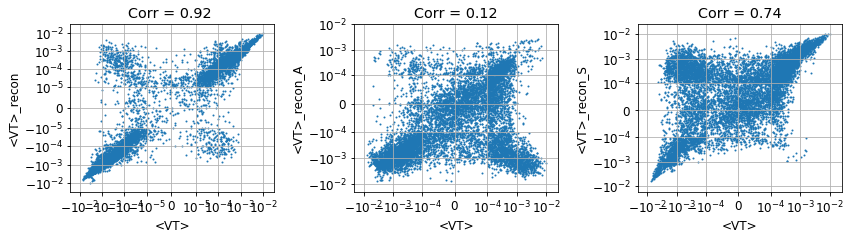

In [133]:
# Upstream
plt.figure(figsize=(12,3.5))

plt.subplot(131)
plt.scatter(T_coarse.VpTp.sel(XCcoarse=slice(0, 800e3), Z=slice(-300,-1800)), 
            frb.VpCp.sel(XCcoarse=slice(0, 800e3), Z=slice(-300,-1800)), s=1)
plt.xlabel('<VT>')
plt.ylabel('<VT>_recon')
#plt.xlim([-0.05, 0.05])
#plt.ylim([-0.05, 0.05])
plt.xscale('symlog',linthreshx=1e-5)
plt.yscale('symlog',linthreshy=1e-5)
plt.title('Corr = 0.92 ')
plt.grid()


plt.subplot(132)
plt.scatter(T_coarse.VpTp.sel(XCcoarse=slice(0, 800e3), Z=slice(-300,-1800)), 
            frb_AT.VpCp.sel(XCcoarse=slice(0, 800e3), Z=slice(-300,-1800)), s=1)
plt.xlabel('<VT>')
plt.ylabel('<VT>_recon_A')
#plt.xlim([-0.05, 0.05])
#plt.ylim([-0.05, 0.05])
plt.xscale('symlog',linthreshx=1e-4)
plt.yscale('symlog',linthreshy=1e-4)
plt.title('Corr = 0.12')
plt.grid()

plt.subplot(133)
plt.scatter(T_coarse.VpTp.sel(XCcoarse=slice(0, 800e3), Z=slice(-300,-1800)), 
            frb_ST.VpCp.sel(XCcoarse=slice(0, 800e3), Z=slice(-300,-1800)), s=1)
plt.xlabel('<VT>')
plt.ylabel('<VT>_recon_S')
#plt.xlim([-0.05, 0.05])
#plt.ylim([-0.05, 0.05])
plt.xscale('symlog',linthreshx=1e-4)
plt.yscale('symlog',linthreshy=1e-4)
plt.title('Corr = 0.74')
plt.grid()


plt.tight_layout()

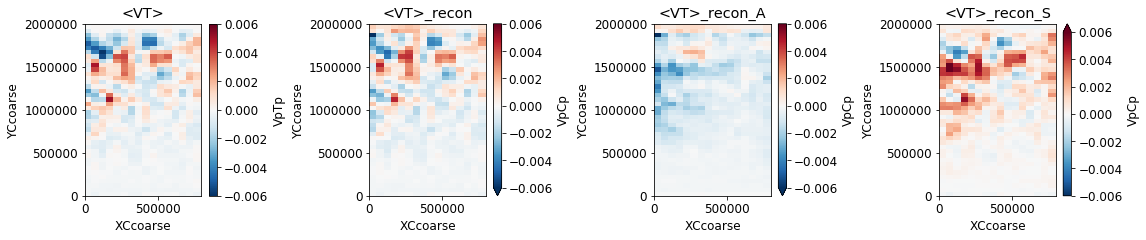

In [149]:
plt.figure(figsize=(16,3.5))

plt.subplot(141)
T_coarse.VpTp.sel(XCcoarse=slice(0, 800e3)).sel(Z=-600, method='nearest').plot(vmin=-6e-3)
plt.title('<VT>')

plt.subplot(142)
frb.VpCp.sel(XCcoarse=slice(0, 800e3)).sel(Z=-600, method='nearest').plot(vmin=-6e-3)
plt.title('<VT>_recon')

plt.subplot(143)
frb_AT.VpCp.sel(XCcoarse=slice(0, 800e3)).sel(Z=-600, method='nearest').plot(vmin=-6e-3)
plt.title('<VT>_recon_A')

plt.subplot(144)
frb_ST.VpCp.sel(XCcoarse=slice(0, 800e3)).sel(Z=-600, method='nearest').plot(vmin=-6e-3)
plt.title('<VT>_recon_S')

plt.tight_layout()

### Downstream

In [152]:
# V velocities (downstream)
corr1 = pearson_corr(T_coarse.VpTp.sel(XCcoarse=slice(1200e3, 2000e3), Z=slice(-300,-1800)), 
                     frb.VpCp.sel(XCcoarse=slice(1200e3, 2000e3), Z=slice(-300,-1800)))
corr2 = pearson_corr(T_coarse.VpTp.sel(XCcoarse=slice(1200e3, 2000e3), Z=slice(-300,-1800)), 
                     frb_AT.VpCp.sel(XCcoarse=slice(1200e3, 2000e3), Z=slice(-300,-1800)))
corr3 = pearson_corr(T_coarse.VpTp.sel(XCcoarse=slice(1200e3, 2000e3), Z=slice(-300,-1800)), 
                     frb_ST.VpCp.sel(XCcoarse=slice(1200e3, 2000e3), Z=slice(-300,-1800)))
corr4 = pearson_corr(T_coarse.VpTp.sel(XCcoarse=slice(1200e3, 2000e3), Z=slice(-300,-1800)), 
                     frb_ST_split.F_para_y.sel(XCcoarse=slice(1200e3, 2000e3), Z=slice(-300,-1800)))
corr1, corr2, corr3, corr4

(<xarray.DataArray ()>
 array(0.987535, dtype=float32), <xarray.DataArray ()>
 array(0.25695, dtype=float32), <xarray.DataArray ()>
 array(0.258542, dtype=float32), <xarray.DataArray ()>
 array(0.258541, dtype=float32))

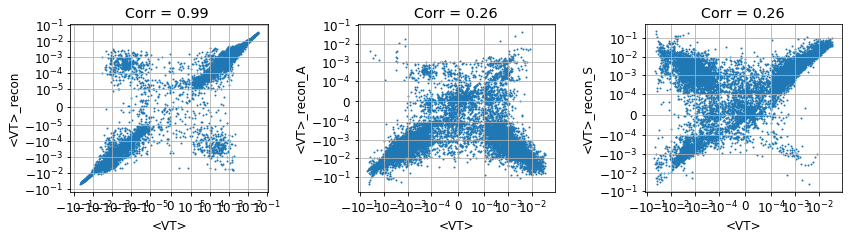

In [134]:
# Upstream
plt.figure(figsize=(12,3.5))

plt.subplot(131)
plt.scatter(T_coarse.VpTp.sel(XCcoarse=slice(1200e3, 2000e3), Z=slice(-300,-1800)), 
            frb.VpCp.sel(XCcoarse=slice(1200e3, 2000e3), Z=slice(-300,-1800)), s=1)
plt.xlabel('<VT>')
plt.ylabel('<VT>_recon')
#plt.xlim([-0.05, 0.05])
#plt.ylim([-0.05, 0.05])
plt.xscale('symlog',linthreshx=1e-5)
plt.yscale('symlog',linthreshy=1e-5)
plt.title('Corr = 0.99 ')
plt.grid()


plt.subplot(132)
plt.scatter(T_coarse.VpTp.sel(XCcoarse=slice(1200e3, 2000e3), Z=slice(-300,-1800)), 
            frb_AT.VpCp.sel(XCcoarse=slice(1200e3, 2000e3), Z=slice(-300,-1800)), s=1)
plt.xlabel('<VT>')
plt.ylabel('<VT>_recon_A')
#plt.xlim([-0.05, 0.05])
#plt.ylim([-0.05, 0.05])
plt.xscale('symlog',linthreshx=1e-4)
plt.yscale('symlog',linthreshy=1e-4)
plt.title('Corr = 0.26')
plt.grid()

plt.subplot(133)
plt.scatter(T_coarse.VpTp.sel(XCcoarse=slice(1200e3, 2000e3), Z=slice(-300,-1800)), 
            frb_ST.VpCp.sel(XCcoarse=slice(1200e3, 2000e3), Z=slice(-300,-1800)), s=1)
plt.xlabel('<VT>')
plt.ylabel('<VT>_recon_S')
#plt.xlim([-0.05, 0.05])
#plt.ylim([-0.05, 0.05])
plt.xscale('symlog',linthreshx=1e-4)
plt.yscale('symlog',linthreshy=1e-4)
plt.title('Corr = 0.26')
plt.grid()


plt.tight_layout()

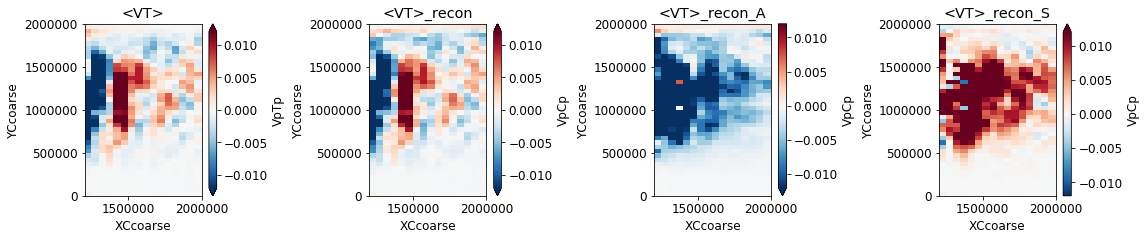

In [151]:
plt.figure(figsize=(16,3.5))

plt.subplot(141)
T_coarse.VpTp.sel(XCcoarse=slice(1200e3, 2000e3)).sel(Z=-600, method='nearest').plot(vmin=-12e-3)
plt.title('<VT>')

plt.subplot(142)
frb.VpCp.sel(XCcoarse=slice(1200e3, 2000e3)).sel(Z=-600, method='nearest').plot(vmin=-12e-3)
plt.title('<VT>_recon')

plt.subplot(143)
frb_AT.VpCp.sel(XCcoarse=slice(1200e3, 2000e3)).sel(Z=-600, method='nearest').plot(vmin=-12e-3)
plt.title('<VT>_recon_A')

plt.subplot(144)
frb_ST.VpCp.sel(XCcoarse=slice(1200e3, 2000e3)).sel(Z=-600, method='nearest').plot(vmin=-12e-3)
plt.title('<VT>_recon_S')

plt.tight_layout()

# Corr for WT

### upstream

In [135]:
corr1 = pearson_corr(T_coarse.WpTp.sel(XCcoarse=slice(0, 800e3), Z=slice(-300,-1800)), 
                     frb.WpCp.sel(XCcoarse=slice(0, 800e3), Z=slice(-300,-1800)))
corr2 = pearson_corr(T_coarse.WpTp.sel(XCcoarse=slice(0, 800e3), Z=slice(-300,-1800)), 
                     frb_AT.WpCp.sel(XCcoarse=slice(0, 800e3), Z=slice(-300,-1800)))
corr3 = pearson_corr(T_coarse.WpTp.sel(XCcoarse=slice(0, 800e3), Z=slice(-300,-1800)), 
                     frb_ST.WpCp.sel(XCcoarse=slice(0, 800e3), Z=slice(-300,-1800)))
corr4 = pearson_corr(T_coarse.WpTp.sel(XCcoarse=slice(0, 800e3), Z=slice(-300,-1800)), 
                     frb_ST_split.F_para_z.sel(XCcoarse=slice(0, 800e3), Z=slice(-300,-1800)))
corr1, corr2, corr3, corr4

(<xarray.DataArray ()>
 array(0.779513, dtype=float32), <xarray.DataArray ()>
 array(0.85765, dtype=float32), <xarray.DataArray ()>
 array(0.205563, dtype=float32), <xarray.DataArray ()>
 array(-0.11497, dtype=float32))

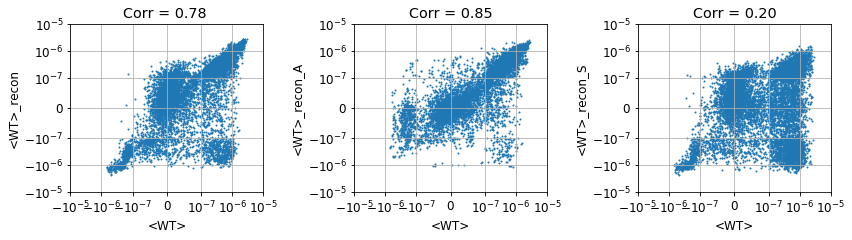

In [140]:
# Upstream
plt.figure(figsize=(12,3.5))

plt.subplot(131)
plt.scatter(T_coarse.WpTp.sel(XCcoarse=slice(0, 800e3), Z=slice(-300,-1800)), 
            frb.WpCp.sel(XCcoarse=slice(0, 800e3), Z=slice(-300,-1800)), s=1)
plt.xlabel('<WT>')
plt.ylabel('<WT>_recon')
plt.xlim([-1e-5, 1e-5])
plt.ylim([-1e-5, 1e-5])
plt.xscale('symlog',linthreshx=1e-7)
plt.yscale('symlog',linthreshy=1e-7)
plt.title('Corr = 0.78 ')
plt.grid()


plt.subplot(132)
plt.scatter(T_coarse.WpTp.sel(XCcoarse=slice(0, 800e3), Z=slice(-300,-1800)), 
            frb_AT.WpCp.sel(XCcoarse=slice(0, 800e3), Z=slice(-300,-1800)), s=1)
plt.xlabel('<WT>')
plt.ylabel('<WT>_recon_A')
plt.xlim([-1e-5, 1e-5])
plt.ylim([-1e-5, 1e-5])
plt.xscale('symlog',linthreshx=1e-7)
plt.yscale('symlog',linthreshy=1e-7)
plt.title('Corr = 0.85')
plt.grid()

plt.subplot(133)
plt.scatter(T_coarse.WpTp.sel(XCcoarse=slice(0, 800e3), Z=slice(-300,-1800)), 
            frb_ST.WpCp.sel(XCcoarse=slice(0, 800e3), Z=slice(-300,-1800)), s=1)
plt.xlabel('<WT>')
plt.ylabel('<WT>_recon_S')
plt.xlim([-1e-5, 1e-5])
plt.ylim([-1e-5, 1e-5])
plt.xscale('symlog',linthreshx=1e-7)
plt.yscale('symlog',linthreshy=1e-7)
plt.title('Corr = 0.20')
plt.grid()


plt.tight_layout()

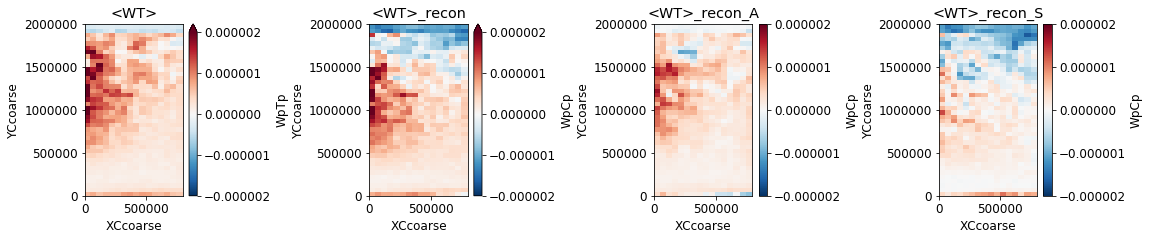

In [155]:
plt.figure(figsize=(16,3.5))

plt.subplot(141)
T_coarse.WpTp.sel(XCcoarse=slice(0, 800e3)).sel(Z=-600, method='nearest').plot(vmin=-2e-6)
plt.title('<WT>')

plt.subplot(142)
frb.WpCp.sel(XCcoarse=slice(0, 800e3)).sel(Z=-600, method='nearest').plot(vmin=-2e-6)
plt.title('<WT>_recon')

plt.subplot(143)
frb_AT.WpCp.sel(XCcoarse=slice(0, 800e3)).sel(Z=-600, method='nearest').plot(vmin=-2e-6)
plt.title('<WT>_recon_A')

plt.subplot(144)
frb_ST.WpCp.sel(XCcoarse=slice(0, 800e3)).sel(Z=-600, method='nearest').plot(vmin=-2e-6)
plt.title('<WT>_recon_S')

plt.tight_layout()

### Downstream

In [156]:
corr1 = pearson_corr(T_coarse.WpTp.sel(XCcoarse=slice(1200e3, 2000e3), Z=slice(-300,-1800)), 
                     frb.WpCp.sel(XCcoarse=slice(1200e3, 2000e3), Z=slice(-300,-1800)))
corr2 = pearson_corr(T_coarse.WpTp.sel(XCcoarse=slice(1200e3, 2000e3), Z=slice(-300,-1800)), 
                     frb_AT.WpCp.sel(XCcoarse=slice(1200e3, 2000e3), Z=slice(-300,-1800)))
corr3 = pearson_corr(T_coarse.WpTp.sel(XCcoarse=slice(1200e3, 2000e3), Z=slice(-300,-1800)), 
                     frb_ST.WpCp.sel(XCcoarse=slice(1200e3, 2000e3), Z=slice(-300,-1800)))
corr4 = pearson_corr(T_coarse.WpTp.sel(XCcoarse=slice(1200e3, 2000e3), Z=slice(-300,-1800)), 
                     frb_ST_split.F_para_z.sel(XCcoarse=slice(1200e3, 2000e3), Z=slice(-300,-1800)))
corr1, corr2, corr3, corr4

(<xarray.DataArray ()>
 array(0.93027, dtype=float32), <xarray.DataArray ()>
 array(0.838883, dtype=float32), <xarray.DataArray ()>
 array(0.172147, dtype=float32), <xarray.DataArray ()>
 array(0.117206, dtype=float32))

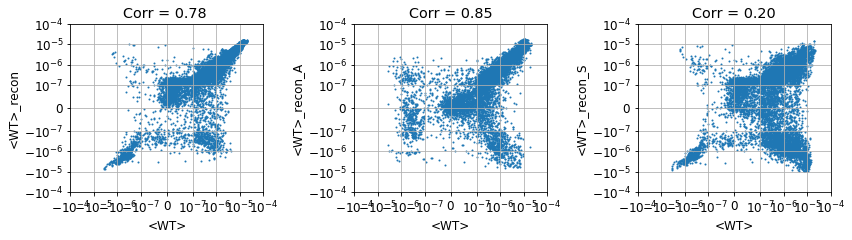

In [160]:
# Upstream
plt.figure(figsize=(12,3.5))

plt.subplot(131)
plt.scatter(T_coarse.WpTp.sel(XCcoarse=slice(1200e3, 2000e3), Z=slice(-300,-1800)), 
            frb.WpCp.sel(XCcoarse=slice(1200e3, 2000e3), Z=slice(-300,-1800)), s=1)
plt.xlabel('<WT>')
plt.ylabel('<WT>_recon')
plt.xlim([-10e-5, 10e-5])
plt.ylim([-10e-5, 10e-5])
plt.xscale('symlog',linthreshx=1e-7)
plt.yscale('symlog',linthreshy=1e-7)
plt.title('Corr = 0.78 ')
plt.grid()


plt.subplot(132)
plt.scatter(T_coarse.WpTp.sel(XCcoarse=slice(1200e3, 2000e3), Z=slice(-300,-1800)), 
            frb_AT.WpCp.sel(XCcoarse=slice(1200e3, 2000e3), Z=slice(-300,-1800)), s=1)
plt.xlabel('<WT>')
plt.ylabel('<WT>_recon_A')
plt.xlim([-10e-5, 10e-5])
plt.ylim([-10e-5, 10e-5])
plt.xscale('symlog',linthreshx=1e-7)
plt.yscale('symlog',linthreshy=1e-7)
plt.title('Corr = 0.85')
plt.grid()

plt.subplot(133)
plt.scatter(T_coarse.WpTp.sel(XCcoarse=slice(1200e3, 2000e3), Z=slice(-300,-1800)), 
            frb_ST.WpCp.sel(XCcoarse=slice(1200e3, 2000e3), Z=slice(-300,-1800)), s=1)
plt.xlabel('<WT>')
plt.ylabel('<WT>_recon_S')
plt.xlim([-10e-5, 10e-5])
plt.ylim([-10e-5, 10e-5])
plt.xscale('symlog',linthreshx=1e-7)
plt.yscale('symlog',linthreshy=1e-7)
plt.title('Corr = 0.20')
plt.grid()


plt.tight_layout()

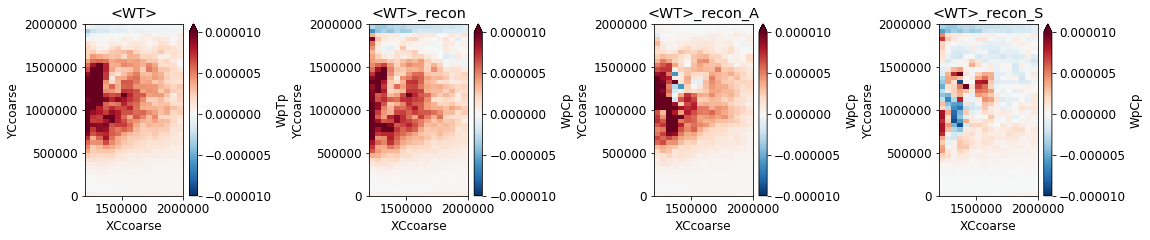

In [159]:
plt.figure(figsize=(16,3.5))

plt.subplot(141)
T_coarse.WpTp.sel(XCcoarse=slice(1200e3, 2000e3)).sel(Z=-600, method='nearest').plot(vmin=-10e-6)
plt.title('<WT>')

plt.subplot(142)
frb.WpCp.sel(XCcoarse=slice(1200e3, 2000e3)).sel(Z=-600, method='nearest').plot(vmin=-10e-6)
plt.title('<WT>_recon')

plt.subplot(143)
frb_AT.WpCp.sel(XCcoarse=slice(1200e3, 2000e3)).sel(Z=-600, method='nearest').plot(vmin=-10e-6)
plt.title('<WT>_recon_A')

plt.subplot(144)
frb_ST.WpCp.sel(XCcoarse=slice(1200e3, 2000e3)).sel(Z=-600, method='nearest').plot(vmin=-10e-6)
plt.title('<WT>_recon_S')

plt.tight_layout()

## Compare magnitudes and orientations


In [119]:
magF =  ((fluxT.UpCp**2 + fluxT.VpCp**2 + fluxT.WpCp**2)**0.5)
magFr =  ((frb_split.UpCp**2 + frb_split.VpCp**2 + frb_split.WpCp**2)**0.5)
magFS = ((frb_ST_split.UpCp**2 + frb_ST_split.VpCp**2 + frb_ST_split.WpCp**2)**0.5)
magFA = ((frb_AT_split.UpCp**2 + frb_AT_split.VpCp**2 + frb_AT_split.WpCp**2)**0.5)

FdotFr = (fluxT.UpCp*frb_split.UpCp + fluxT.VpCp*frb_split.VpCp + fluxT.WpCp*frb_split.WpCp)/magF/magFr
FdotFS = (fluxT.UpCp*frb_ST_split.UpCp + fluxT.VpCp*frb_ST_split.VpCp + fluxT.WpCp*frb_ST_split.WpCp)/magF/magFS
FdotFA = (fluxT.UpCp*frb_AT_split.UpCp + fluxT.VpCp*frb_AT_split.VpCp + fluxT.WpCp*frb_AT_split.WpCp)/magF/magFA

In [201]:
maggradB = (T_coarse.T_X**2 + T_coarse.T_Y**2 + T_coarse.T_Z**2)**0.5 
FTgradB = (fluxT.UpCp*T_coarse.T_X + fluxT.VpCp*T_coarse.T_Y + fluxT.WpCp*T_coarse.T_Z)/maggradB**2
SgradBgradB = (frb_split.UpCp*T_coarse.T_X + frb_split.VpCp*T_coarse.T_Y + frb_split.WpCp*T_coarse.T_Z)/maggradB**2

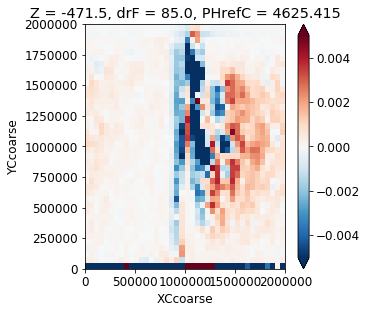

In [203]:
FTgradB.sel(Z=-500, method='nearest').plot(vmin=-5e-3)

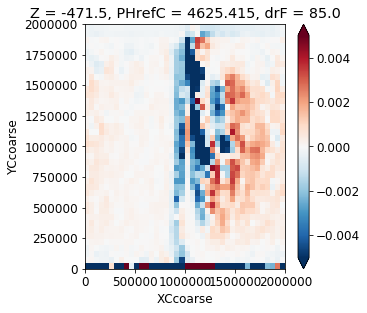

In [202]:
SgradBgradB.sel(Z=-500, method='nearest').plot(vmin=-5e-3)

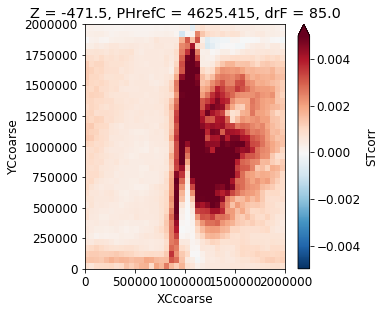

In [199]:
diff_tensor.STcorr.sel(Z=-500, method='nearest').isel(i=2,j=2).plot(vmin=-5e-3)

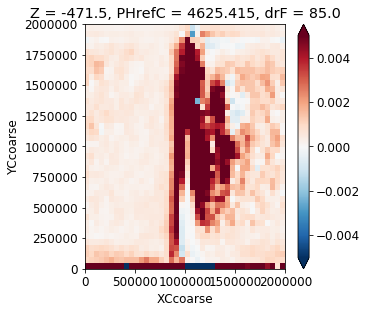

In [200]:
(diff_tensor.STcorr - SgradBgradB).sel(Z=-500, method='nearest').isel(i=2,j=2).plot(vmin=-5e-3)

In [179]:
magFr_perp =  ((frb_split.F_perp_x**2 + frb_split.F_perp_y**2 + frb_split.F_perp_z**2)**0.5)
magFr_para =  ((frb_split.F_para_x**2 + frb_split.F_para_y**2 + frb_split.F_para_z**2)**0.5)


magFS = ((frb_ST_split.UpCp**2 + frb_ST_split.VpCp**2 + frb_ST_split.WpCp**2)**0.5)
magFA = ((frb_AT_split.UpCp**2 + frb_AT_split.VpCp**2 + frb_AT_split.WpCp**2)**0.5)

<xarray.Dataset>
Dimensions:      (XCcoarse: 40, YCcoarse: 40, Z: 40)
Coordinates:
  * Z            (Z) float32 -5.0 -15.0 -25.0 -36.0 ... -2727.5 -2830.5 -2933.5
  * YCcoarse     (YCcoarse) float32 25000.0 75000.0 ... 1925000.0 1975000.0
  * XCcoarse     (XCcoarse) float32 25000.0 75000.0 ... 1925000.0 1975000.0
    hFacCcoarse  (Z, YCcoarse, XCcoarse) float32 0.9 0.9 0.9 0.9 ... 1.0 1.0 1.0
    PHrefC       (Z) float32 49.05 147.15 245.25 ... 27767.205 28777.635
    drF          (Z) float32 10.0 10.0 10.0 12.0 ... 103.0 103.0 103.0 103.0
Data variables:
    UpCp         (Z, YCcoarse, XCcoarse) float32 -0.006504652 ... 0.0001231041
    VpCp         (Z, YCcoarse, XCcoarse) float32 0.00059156294 ... -3.4042117e-05
    WpCp         (Z, YCcoarse, XCcoarse) float32 -0.00027838693 ... -1.09890275e-08
    F_perp_x     (Z, YCcoarse, XCcoarse) float32 1.8653677e-07 ... 5.4588922e-06
    F_perp_y     (Z, YCcoarse, XCcoarse) float32 0.00045640615 ... -4.754857e-05
    F_perp_z     (Z, YCcoarse, 

/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


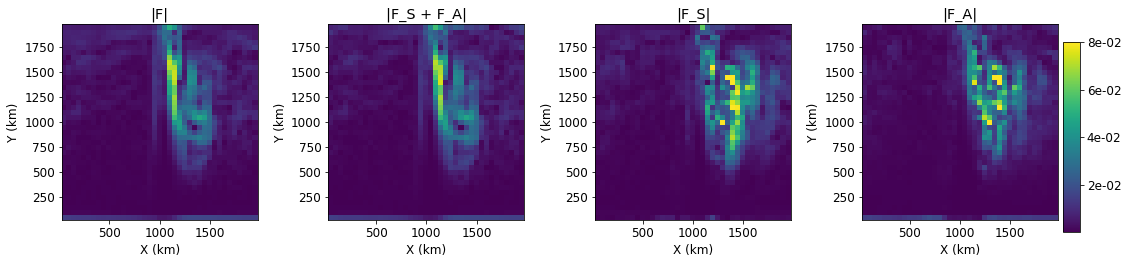

In [108]:
# |F| 

fig, ax = plt.subplots(1, 4, figsize=(15, 4))

ax[0].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, magF.sel(Z=-500, method='nearest'), vmax=0.08)
ax[0].set_title('|F|')
ax[0].set_xlabel('X (km)')
ax[0].set_ylabel('Y (km)')
ax[0].set_aspect('equal')

ax[1].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, magFr.sel(Z=-500, method='nearest'), vmax=0.08)
ax[1].set_title('|F_S + F_A|')
ax[1].set_xlabel('X (km)')
ax[1].set_ylabel('Y (km)')
ax[1].set_aspect('equal')

ax[2].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, magFS.sel(Z=-500, method='nearest'), vmax=0.08)
ax[2].set_title('|F_S|')
ax[2].set_xlabel('X (km)')
ax[2].set_ylabel('Y (km)')
ax[2].set_aspect('equal')

im = ax[3].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, magFA.sel(Z=-500, method='nearest'), vmax=0.08)
ax[3].set_title('|F_A|')
ax[3].set_xlabel('X (km)')
ax[3].set_ylabel('Y (km)')
ax[3].set_aspect('equal')

cbar_ax = fig.add_axes([0.99, 0.15, 0.015, 0.66])
fig.colorbar(im, cax=cbar_ax,format='%.0e')


plt.tight_layout()

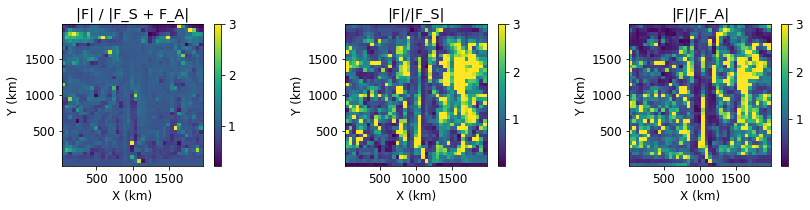

In [128]:
# |F| 

fig, ax = plt.subplots(1, 3, figsize=(12, 3))

im = ax[0].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, (magF/ magFr).sel(Z=-500, method='nearest'), vmax=3)
ax[0].set_title('|F| / |F_S + F_A|')
ax[0].set_xlabel('X (km)')
ax[0].set_ylabel('Y (km)')
ax[0].set_aspect('equal')
fig.colorbar(im, ax=ax[0])


im = ax[1].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, (magFS/ magF).sel(Z=-500, method='nearest'), vmax=3)
ax[1].set_title('|F|/|F_S|')
ax[1].set_xlabel('X (km)')
ax[1].set_ylabel('Y (km)')
ax[1].set_aspect('equal')
fig.colorbar(im, ax=ax[1])

im= ax[2].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, (magFA/ magF).sel(Z=-500, method='nearest'), vmax=3)
ax[2].set_title('|F|/|F_A|')
ax[2].set_xlabel('X (km)')
ax[2].set_ylabel('Y (km)')
ax[2].set_aspect('equal')

fig.colorbar(im, ax=ax[2])


plt.tight_layout()

Text(0.5, 1.0, 'Z=500m')

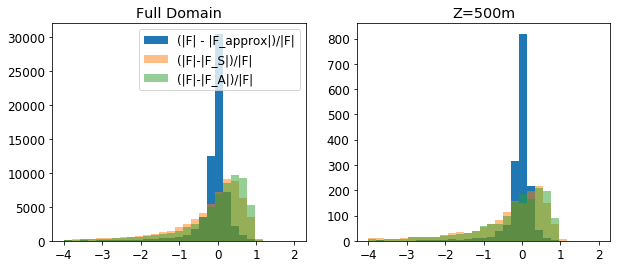

In [132]:
bins = np.linspace(-4,2,30)

plt.figure(figsize=(10,4))

plt.subplot(121)
[_,_,_] = ((magF -magFr)/ magF).plot.hist(bins=bins, label='(|F| - |F_approx|)/|F|')
[_,_,_] = ((magF -magFS)/ magF).plot.hist(bins=bins, alpha=0.5, label='(|F|-|F_S|)/|F|')
[_,_,_] = ((magF -magFA)/ magF).plot.hist(bins=bins, alpha=0.5, label='(|F|-|F_A|)/|F|')
plt.legend()
plt.title('Full Domain')

plt.subplot(122)
[_,_,_] = ((magF -magFr)/ magF).sel(Z=-500,method='nearest').plot.hist(bins=bins, label='F/F_approx')
[_,_,_] = ((magF -magFS)/ magF).sel(Z=-500,method='nearest').plot.hist(bins=bins, alpha=0.5, label='F/F_S')
[_,_,_] = ((magF -magFA)/ magF).sel(Z=-500,method='nearest').plot.hist(bins=bins, alpha=0.5, label='F/F_A')
#plt.legend()
plt.title('Z=500m')

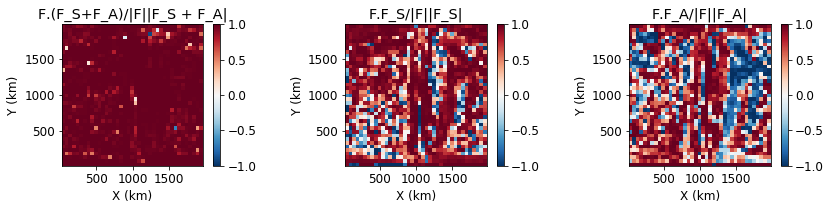

In [123]:
# |F| 

fig, ax = plt.subplots(1, 3, figsize=(12, 3))

im = ax[0].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, (FdotFr).sel(Z=-500, method='nearest'), vmin=-1, vmax=1, cmap='RdBu_r')
ax[0].set_title('F.(F_S+F_A)/|F||F_S + F_A|')
ax[0].set_xlabel('X (km)')
ax[0].set_ylabel('Y (km)')
ax[0].set_aspect('equal')
fig.colorbar(im, ax=ax[0])


im = ax[1].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, (FdotFS).sel(Z=-500, method='nearest'), vmin=-1, vmax=1, cmap='RdBu_r')
ax[1].set_title('F.F_S/|F||F_S|')
ax[1].set_xlabel('X (km)')
ax[1].set_ylabel('Y (km)')
ax[1].set_aspect('equal')
fig.colorbar(im, ax=ax[1])

im= ax[2].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, (FdotFA).sel(Z=-500, method='nearest'), vmin=-1, vmax=1, cmap='RdBu_r')
ax[2].set_title('F.F_A/|F||F_A|')
ax[2].set_xlabel('X (km)')
ax[2].set_ylabel('Y (km)')
ax[2].set_aspect('equal')

fig.colorbar(im, ax=ax[2])


plt.tight_layout()

Text(0.5, 1.0, 'Z=500m')

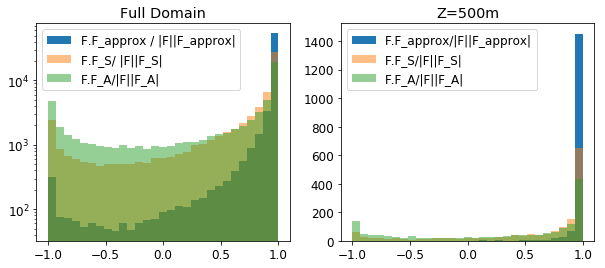

In [127]:
bins = np.linspace(-1,1,30)

plt.figure(figsize=(10,4))

plt.subplot(121)
[_,_,_] = (FdotFr).plot.hist(bins=bins, label='F.F_approx / |F||F_approx|')
[_,_,_] = (FdotFS).plot.hist(bins=bins, alpha=0.5, label='F.F_S/ |F||F_S|')
[_,_,_] = (FdotFA).plot.hist(bins=bins, alpha=0.5, label='F.F_A/|F||F_A|')
plt.yscale('log')
plt.legend()
plt.title('Full Domain')

plt.subplot(122)
[_,_,_] = (FdotFr).sel(Z=-500,method='nearest').plot.hist(bins=bins, label='F.F_approx/|F||F_approx|')
[_,_,_] = (FdotFS).sel(Z=-500,method='nearest').plot.hist(bins=bins, alpha=0.5, label='F.F_S/|F||F_S|')
[_,_,_] = (FdotFA).sel(Z=-500,method='nearest').plot.hist(bins=bins, alpha=0.5, label='F.F_A/|F||F_A|')
plt.legend()
plt.title('Z=500m')

## Orientation of buoyancy flux in the horizontal direction 

Are buoyancy fluxes locally downgradient at a horizontal level?

Plot below shows that horizontally the fluxes are both down and upgradient. 

In [137]:
FHmag = (T_coarse.UpTp**2 + T_coarse.VpTp**2)**0.5

Text(0.5, 1.0, 'T - contours, F_B direction - quiver')

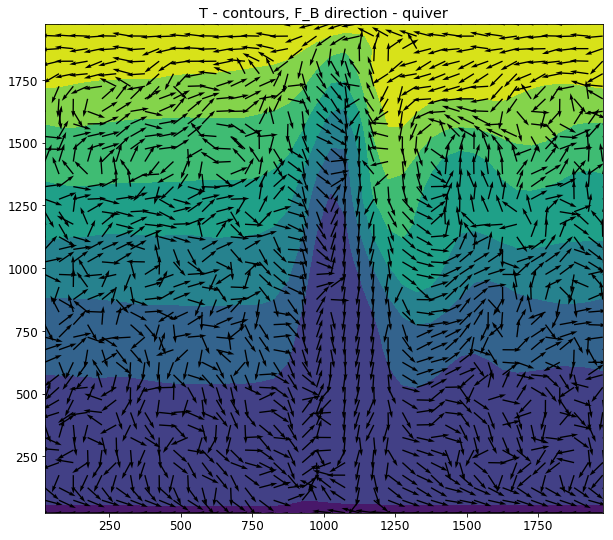

In [147]:

plt.figure(figsize=(10,9))
plt.contourf(Xcoarse/1e3, Ycoarse/1e3, T_coarse['T'].sel(Z=-500, method='nearest'))
plt.quiver(Xcoarse/1e3, Ycoarse/1e3, (T_coarse.UpTp/FHmag).sel(Z=-500, method='nearest'), (T_coarse.VpTp/FHmag).sel(Z=-500, method='nearest'),
          scale=30)
plt.title('T - contours, F_B direction - quiver')

Text(0.5, 1.0, 'T - contours, F_B direction - quiver')

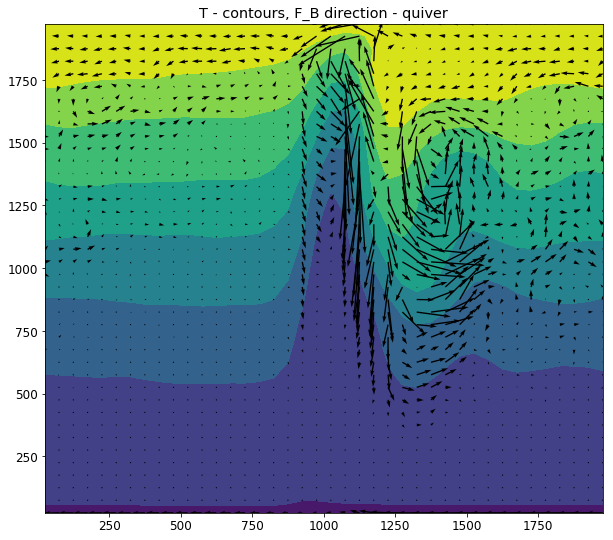

In [150]:

plt.figure(figsize=(10,9))
plt.contourf(Xcoarse/1e3, Ycoarse/1e3, T_coarse['T'].sel(Z=-500, method='nearest'))
plt.quiver(Xcoarse/1e3, Ycoarse/1e3, (T_coarse.UpTp).sel(Z=-500, method='nearest'), (T_coarse.VpTp).sel(Z=-500, method='nearest'),
          scale=0.5)
plt.title('T - contours, F_B direction - quiver')

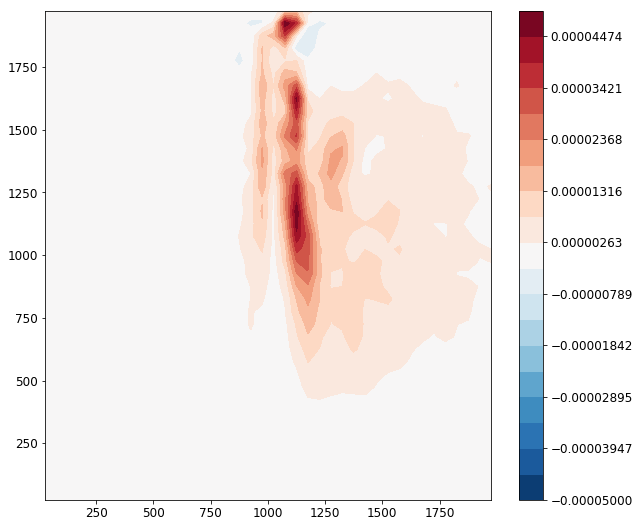

In [161]:
plt.figure(figsize=(10,9))
plt.contourf(Xcoarse/1e3, Ycoarse/1e3, T_coarse.WpTp.sel(Z=-500, method='nearest'), cmap='RdBu_r',
             vmin=-5e-5,vmax=5e-5, levels=np.linspace(-5e-5,5e-5,20))
plt.colorbar()

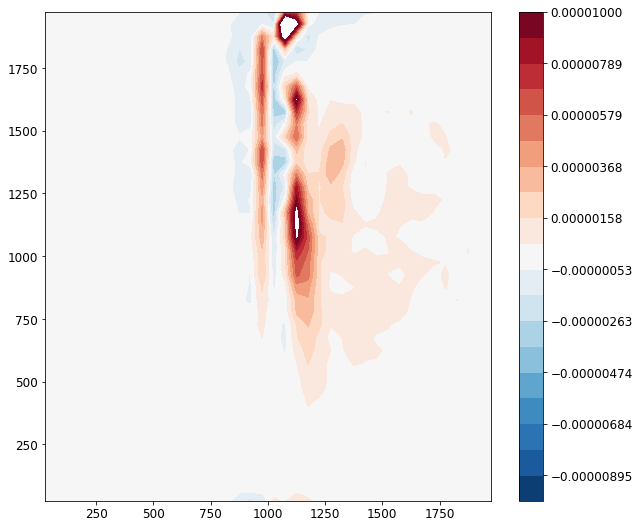

In [163]:
plt.figure(figsize=(10,9))
plt.contourf(Xcoarse/1e3, Ycoarse/1e3, T_coarse.WpTp.sel(Z=-1500, method='nearest'), cmap='RdBu_r',
             vmin=-1e-5,vmax=1e-5, levels=np.linspace(-1e-5,1e-5,20))
plt.colorbar()

In [166]:
T_coarse.WpTp

<xarray.DataArray 'WpTp' (Z: 40, YCcoarse: 40, XCcoarse: 40)>
array([[[ 4.695288e-07,  4.815381e-07, ...,  4.715328e-07,  4.638736e-07],
        [ 5.827802e-07,  5.689739e-07, ...,  6.005275e-07,  5.903685e-07],
        ...,
        [ 2.319407e-07,  2.319662e-07, ...,  2.341876e-07,  2.531760e-07],
        [ 4.538106e-08,  4.345475e-08, ...,  4.852063e-08,  4.615322e-08]],

       [[ 1.301316e-06,  1.336549e-06, ...,  1.304827e-06,  1.286051e-06],
        [ 1.619974e-06,  1.583118e-06, ...,  1.661115e-06,  1.637750e-06],
        ...,
        [ 5.625661e-07,  5.600814e-07, ...,  5.821275e-07,  6.332957e-07],
        [ 9.652831e-08,  9.362702e-08, ...,  1.049884e-07,  9.793985e-08]],

       ...,

       [[-4.640704e-08, -5.250117e-08, ..., -3.689853e-08, -4.203012e-08],
        [ 1.399548e-08,  1.420905e-08, ...,  1.474495e-08,  1.376985e-08],
        ...,
        [-4.146015e-09, -4.338713e-09, ..., -7.534902e-09, -7.646078e-09],
        [-2.256185e-07, -1.960589e-07, ..., -2.794303e-07

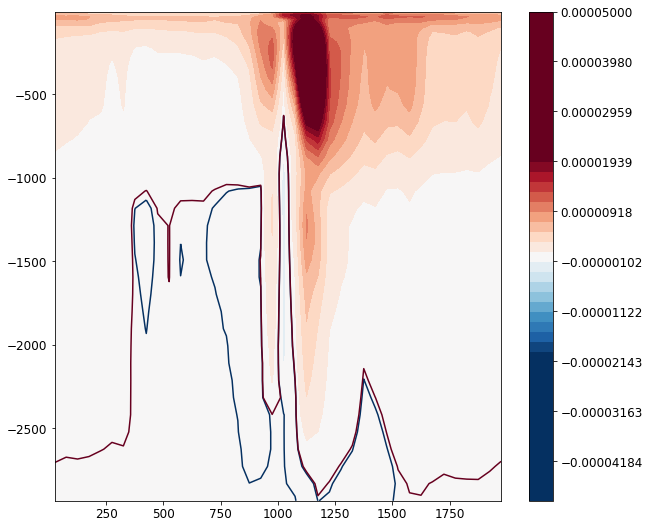

In [177]:
plt.figure(figsize=(10,9))
plt.contourf(Xcoarse/1e3, Z, T_coarse.WpTp.sel(YCcoarse=1000e3, method='nearest'), cmap='RdBu_r',
             vmin=-2e-5,vmax=2e-5, levels=np.linspace(-5e-5,5e-5,50))
plt.colorbar()
plt.contour(Xcoarse/1e3, Z, T_coarse.WpTp.sel(YCcoarse=1000e3, method='nearest'), cmap='RdBu_r',
            levels=[-1e-8,1e-8])


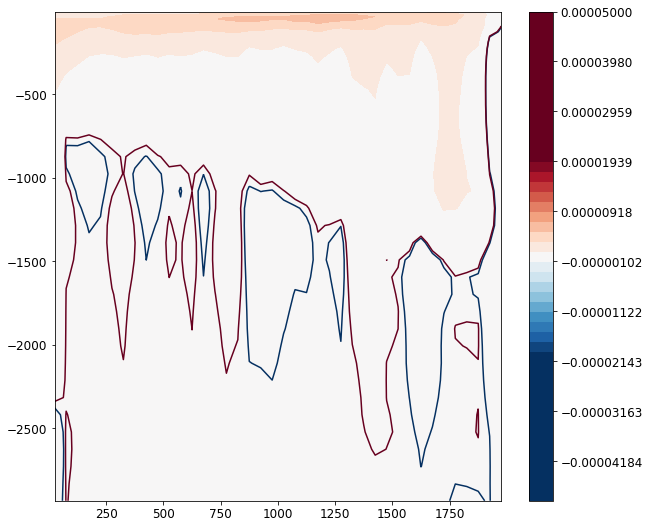

In [178]:
plt.figure(figsize=(10,9))
plt.contourf(Ycoarse/1e3, Z, T_coarse.WpTp.sel(XCcoarse=400e3, method='nearest'), cmap='RdBu_r',
             vmin=-2e-5,vmax=2e-5, levels=np.linspace(-5e-5,5e-5,50))
plt.colorbar()
plt.contour(Ycoarse/1e3, Z, T_coarse.WpTp.sel(XCcoarse=400e3, method='nearest'), cmap='RdBu_r',
            levels=[-1e-8,1e-8])


## What is the $\theta$ angle? 

The angle between the "vertical" eigen vector and the normal to isopycnal direction. 

\begin{equation}
V_3.\hat{n} = cos(\theta)
\end{equation}

In [210]:
V3 = diff_tensor.eigvecsSTcorr.isel(ii=0)

In [211]:
costheta = (T_coarse.T_X*V3.isel(k=0)  + T_coarse.T_Y*V3.isel(k=1) + T_coarse.T_Z*V3.isel(k=2))/ maggradB

Text(0.5, 1.0, 'costheta')

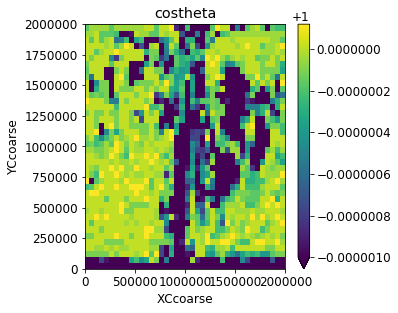

In [222]:
costheta.sel(Z=-500, method='nearest').plot(vmin=0.999999)
plt.title('costheta')

## What is $S_{||}$?
What are the eigenvalues and eigenvectors of this the "parallel" part of S. 

$\nabla.(\overline{\mathbf{u}' b'})$

In [223]:
def div_coarse(flux, grid, Lcoarse):
   
    divUpCp = grid.interp(grid.diff(flux.UpCp, 'X')/Lcoarse, 'X') + \
              grid.interp(grid.diff(flux.VpCp, 'Y', boundary='extend')/Lcoarse, 'Y', boundary='extend') + \
             -grid.interp(grid.diff(flux.WpCp, 'Z', boundary='extend'), 'Z', boundary='extend')/ flux.drF
    
    return divUpCp

In [224]:
grid_ds = xr.Dataset()
grid_ds['TRAC01'] = Trac_coarse['TRAC01']
grid_ds['wVeltave'] = Model_Tav['wVeltave']
grid_ds = grid_ds.drop(['wVeltave','XC','YC']).isel(XC=0, YC=0)
ds = generate_grid_ds(grid_ds, {'X': 'XCcoarse', 'Y':'YCcoarse'})
grid = Grid(ds, periodic='X')

In [228]:
div_Tflux = div_coarse(fluxT, grid, 50e3)
div_frb   = div_coarse(frb,   grid, 50e3)

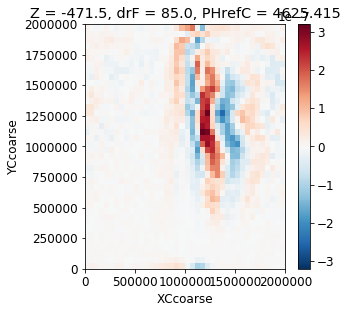

In [231]:
div_Tflux.sel(Z=-500, method='nearest').plot()

In [246]:
flux_transport_U = Vels_coarse.U * div_Tflux 
flux_transport_V = Vels_coarse.V * div_Tflux 
flux_transport_W = Vels_coarse.W * div_Tflux 

In [247]:
flux_transport =xr.Dataset({'UpCp' : flux_transport_U, 'VpCp' : flux_transport_V, 'WpCp' : flux_transport_W})

In [251]:
div_frbST = div_coarse(frb_ST , grid, 50e3)
div_flux_transport = div_coarse(flux_transport, grid, 50e3)

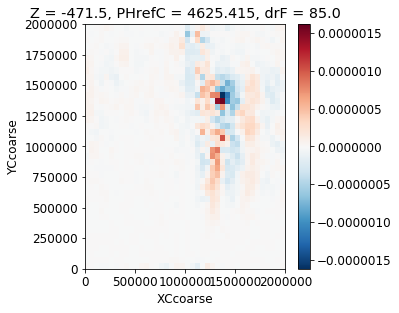

In [252]:
div_frbST.sel(Z=-500, method='nearest').plot()

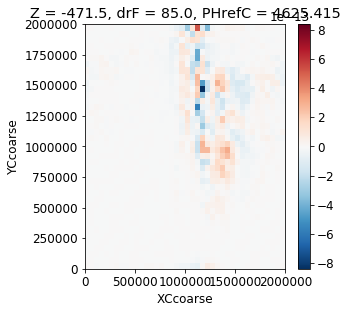

In [254]:
(-div_flux_transport).sel(Z=-500, method='nearest').plot()

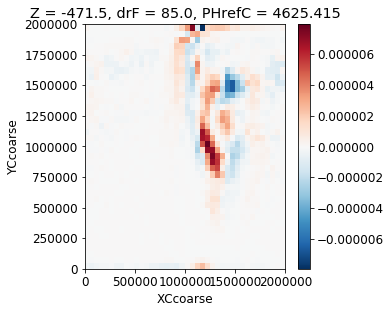

In [242]:
flux_transport_U.sel(Z=-500, method='nearest').plot()

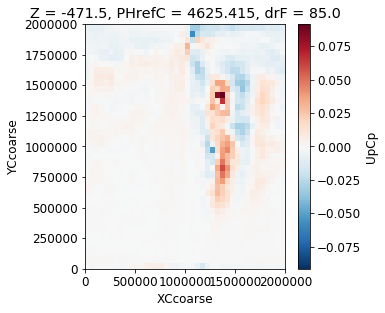

In [239]:
frb_ST.UpCp.sel(Z=-500, method='nearest').plot()

(-1e-05, 1e-05)

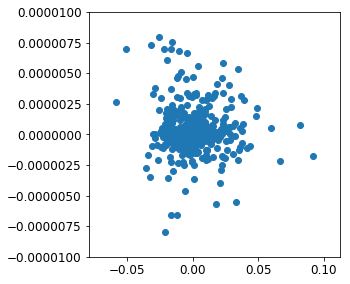

In [244]:
plt.scatter(frb_ST.UpCp.sel(Z=-500, method='nearest'), flux_transport_U.sel(Z=-500, method='nearest'))
plt.ylim([-1e-5, 1e-5])

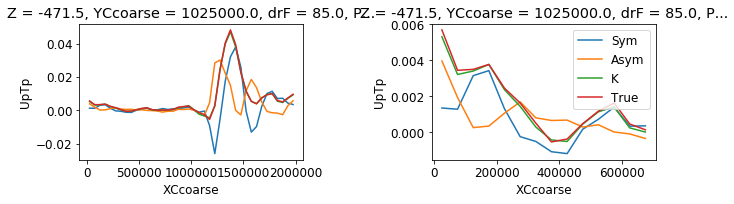

In [47]:
# line plots of how fluxes are computed from different parts 
plt.figure(figsize=(10,3))

plt.subplot(121)
flux_rec_buoy_ST.UpCp.sel(Z=-500, YCcoarse=1000e3, method='nearest').plot(label='Sym')
flux_rec_buoy_AT.UpCp.sel(Z=-500, YCcoarse=1000e3, method='nearest').plot(label='Asym')
(flux_rec_buoy_AT + flux_rec_buoy_ST).UpCp.sel(Z=-500, YCcoarse=1000e3, method='nearest').plot(label='K')
T_coarse.UpTp.sel(Z=-500, YCcoarse=1000e3, method='nearest').plot(label='True')

plt.subplot(122)
flux_rec_buoy_ST.UpCp.sel(Z=-500, YCcoarse=1000e3, method='nearest').sel(XCcoarse=slice(0, 700e3)).plot(label='Sym')
flux_rec_buoy_AT.UpCp.sel(Z=-500, YCcoarse=1000e3, method='nearest').sel(XCcoarse=slice(0, 700e3)).plot(label='Asym')
(flux_rec_buoy_AT + flux_rec_buoy_ST).UpCp.sel(Z=-500, YCcoarse=1000e3, method='nearest').sel(XCcoarse=slice(0, 700e3)).plot(label='K')
T_coarse.UpTp.sel(Z=-500, YCcoarse=1000e3, method='nearest').sel(XCcoarse=slice(0, 700e3)).plot(label='True')
plt.legend()

plt.tight_layout()

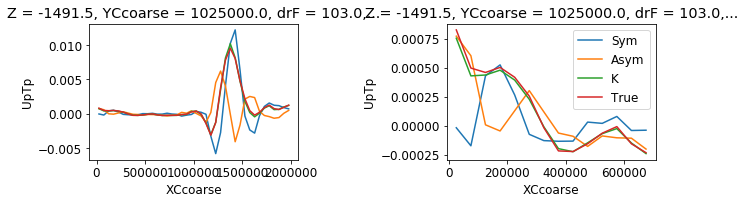

In [49]:
# line plots of how fluxes are computed from different parts 
plt.figure(figsize=(10,3))

plt.subplot(121)
flux_rec_buoy_ST.UpCp.sel(Z=-1500, YCcoarse=1000e3, method='nearest').plot(label='Sym')
flux_rec_buoy_AT.UpCp.sel(Z=-1500, YCcoarse=1000e3, method='nearest').plot(label='Asym')
(flux_rec_buoy_AT + flux_rec_buoy_ST).UpCp.sel(Z=-1500, YCcoarse=1000e3, method='nearest').plot(label='K')
T_coarse.UpTp.sel(Z=-1500, YCcoarse=1000e3, method='nearest').plot(label='True')

plt.subplot(122)
flux_rec_buoy_ST.UpCp.sel(Z=-1500, YCcoarse=1000e3, method='nearest').sel(XCcoarse=slice(0, 700e3)).plot(label='Sym')
flux_rec_buoy_AT.UpCp.sel(Z=-1500, YCcoarse=1000e3, method='nearest').sel(XCcoarse=slice(0, 700e3)).plot(label='Asym')
(flux_rec_buoy_AT + flux_rec_buoy_ST).UpCp.sel(Z=-1500, YCcoarse=1000e3, method='nearest').sel(XCcoarse=slice(0, 700e3)).plot(label='K')
T_coarse.UpTp.sel(Z=-1500, YCcoarse=1000e3, method='nearest').sel(XCcoarse=slice(0, 700e3)).plot(label='True')
plt.legend()

plt.tight_layout()

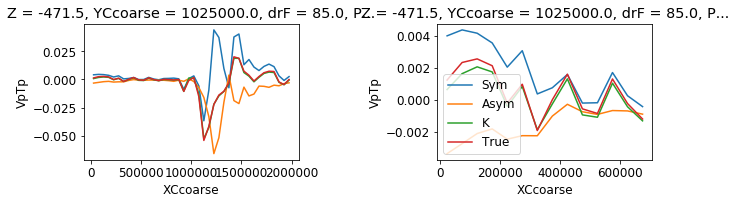

In [255]:
# line plots of how fluxes are computed from different parts 
plt.figure(figsize=(10,3))

plt.subplot(121)
flux_rec_buoy_ST.VpCp.sel(Z=-500, YCcoarse=1000e3, method='nearest').plot(label='Sym')
flux_rec_buoy_AT.VpCp.sel(Z=-500, YCcoarse=1000e3, method='nearest').plot(label='Asym')
(flux_rec_buoy_AT + flux_rec_buoy_ST).VpCp.sel(Z=-500, YCcoarse=1000e3, method='nearest').plot(label='K')
T_coarse.VpTp.sel(Z=-500, YCcoarse=1000e3, method='nearest').plot(label='True')

plt.subplot(122)
flux_rec_buoy_ST.VpCp.sel(Z=-500, YCcoarse=1000e3, method='nearest').sel(XCcoarse=slice(0, 700e3)).plot(label='Sym')
flux_rec_buoy_AT.VpCp.sel(Z=-500, YCcoarse=1000e3, method='nearest').sel(XCcoarse=slice(0, 700e3)).plot(label='Asym')
(flux_rec_buoy_AT + flux_rec_buoy_ST).VpCp.sel(Z=-500, YCcoarse=1000e3, method='nearest').sel(XCcoarse=slice(0, 700e3)).plot(label='K')
T_coarse.VpTp.sel(Z=-500, YCcoarse=1000e3, method='nearest').sel(XCcoarse=slice(0, 700e3)).plot(label='True')
plt.legend()

plt.tight_layout()

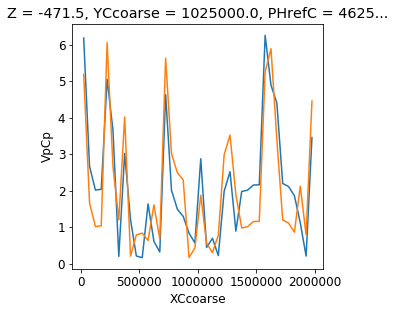

In [107]:
(np.abs(flux_rec_buoy_ST/(flux_rec_buoy_AT + flux_rec_buoy_ST))).VpCp.sel(Z=-500, YCcoarse=1000e3, method='nearest').plot()
(np.abs(flux_rec_buoy_AT/(flux_rec_buoy_AT + flux_rec_buoy_ST))).VpCp.sel(Z=-500, YCcoarse=1000e3, method='nearest').plot()


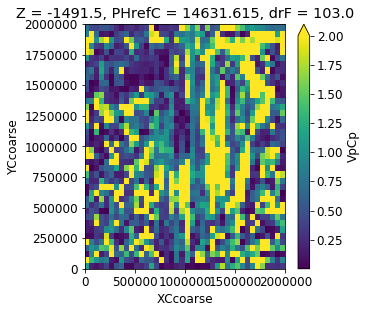

In [110]:
(np.abs(flux_rec_buoy_AT/(flux_rec_buoy_AT + flux_rec_buoy_ST))).VpCp.sel(Z=-1500, method='nearest').plot(vmax=2)

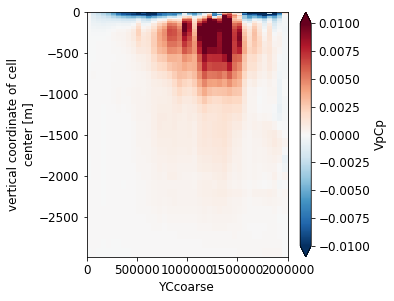

In [162]:
flux_rec_buoy_ST.VpCp.mean('XCcoarse').plot(vmin=-0.01)

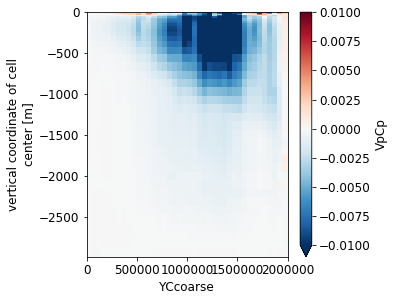

In [163]:
flux_rec_buoy_AT.VpCp.mean('XCcoarse').plot(vmin=-0.01)

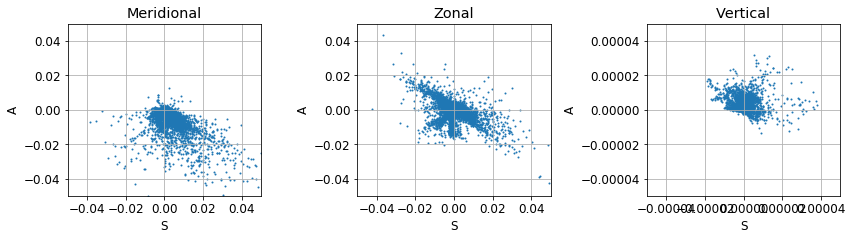

In [81]:
plt.figure(figsize=(12,3.5))

plt.subplot(131)
plt.scatter(flux_rec_buoy_ST.VpCp.sel(Z=slice(-500,-1500)), 
            flux_rec_buoy_AT.VpCp.sel(Z=slice(-500,-1500)), s=1)
plt.xlabel('S')
plt.ylabel('A')
plt.xlim([-0.05, 0.05])
plt.ylim([-0.05, 0.05])
plt.title('Meridional')
plt.grid()

plt.subplot(132)
plt.scatter(flux_rec_buoy_ST.UpCp.sel(Z=slice(-500,-1500)), 
            flux_rec_buoy_AT.UpCp.sel(Z=slice(-500,-1500)), s=1)

plt.xlabel('S')
plt.ylabel('A')
plt.xlim([-0.05, 0.05])
plt.ylim([-0.05, 0.05])
plt.title('Zonal')
plt.grid()

plt.subplot(133)
plt.scatter(flux_rec_buoy_ST.WpCp.sel(Z=slice(-500,-1500)), 
            flux_rec_buoy_AT.WpCp.sel(Z=slice(-500,-1500)), s=1)

plt.xlabel('S')
plt.ylabel('A')
plt.xlim([-5e-5, 5e-5])
plt.ylim([-5e-5, 5e-5])
plt.title('Vertical')
plt.grid()
plt.tight_layout()

In [156]:
# When aligning the flux with the mean flow. 

TSflux_along = (flux_rec_buoy_ST.UpCp * Vels_coarse.U + flux_rec_buoy_ST.VpCp * Vels_coarse.V)/ (Vels_coarse.U**2 + Vels_coarse.V**2)**0.5
TAflux_along = (flux_rec_buoy_AT.UpCp * Vels_coarse.U + flux_rec_buoy_AT.VpCp * Vels_coarse.V)/ (Vels_coarse.U**2 + Vels_coarse.V**2)**0.5

#TSflux_across = (flux_rec_buoy_ST.UpCp**2 + flux_rec_buoy_ST.VpCp**2)**0.5 - TSflux_along
#TAflux_across = (flux_rec_buoy_AT.UpCp**2 + flux_rec_buoy_AT.VpCp**2)**0.5 - TAflux_along
TSflux_across  = (Vels_coarse.U*flux_rec_buoy_ST.VpCp - Vels_coarse.V*flux_rec_buoy_ST.UpCp)/ (Vels_coarse.U**2 + Vels_coarse.V**2)**0.5
TAflux_across  = (Vels_coarse.U*flux_rec_buoy_AT.VpCp - Vels_coarse.V*flux_rec_buoy_AT.UpCp)/ (Vels_coarse.U**2 + Vels_coarse.V**2)**0.5

Ttrueflux_across = (Vels_coarse.U*T_coarse.VpTp - Vels_coarse.V*T_coarse.UpTp)/ (Vels_coarse.U**2 + Vels_coarse.V**2)**0.5

FScart = (flux_rec_buoy_ST.UpCp**2 + flux_rec_buoy_ST.VpCp**2)
FSflow = (TSflux_along**2 + TSflux_across**2)

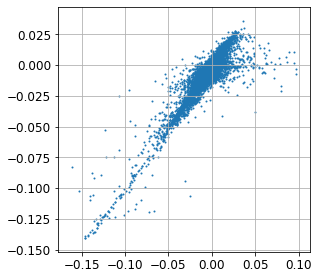

In [160]:
plt.scatter(TSflux_across+TAflux_across, Ttrueflux_across, s=1)
plt.grid()

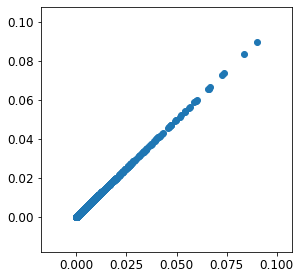

In [79]:
# check if the coordinate transformation worked 
plt.scatter(FScart, FSflow)

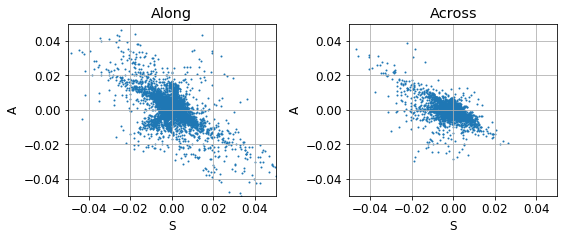

In [80]:
plt.figure(figsize=(8,3.5))

plt.subplot(121)
plt.scatter(TSflux_along.sel(Z=slice(-500,-1500)), 
            TAflux_along.sel(Z=slice(-500,-1500)), s=1)
plt.xlabel('S')
plt.ylabel('A')
plt.xlim([-0.05, 0.05])
plt.ylim([-0.05, 0.05])
plt.title('Along')
plt.grid()

plt.subplot(122)
plt.scatter(TSflux_across.sel(Z=slice(-500,-1500)), 
            TAflux_across.sel(Z=slice(-500,-1500)), s=1)

plt.xlabel('S')
plt.ylabel('A')
plt.xlim([-0.05, 0.05])
plt.ylim([-0.05, 0.05])
plt.title('Across')
plt.grid()

plt.tight_layout()

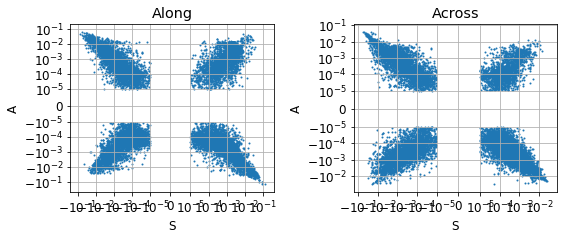

In [90]:
plt.figure(figsize=(8,3.5))

plt.subplot(121)
plt.scatter(TSflux_along.sel(Z=slice(-500,-1500)), 
            TAflux_along.sel(Z=slice(-500,-1500)), s=1)
plt.xlabel('S')
plt.ylabel('A')
#plt.xlim([-0.05, 0.05])
#plt.ylim([-0.05, 0.05])
plt.xscale('symlog',linthreshx=1e-5)
plt.yscale('symlog',linthreshy=1e-5)
plt.title('Along')
plt.grid()

plt.subplot(122)
plt.scatter(TSflux_across.sel(Z=slice(-500,-1500)), 
            TAflux_across.sel(Z=slice(-500,-1500)), s=1)

plt.xlabel('S')
plt.ylabel('A')
#plt.xlim([-0.05, 0.05])
#plt.ylim([-0.05, 0.05])
plt.xscale('symlog',linthreshx=1e-5)
plt.yscale('symlog',linthreshy=1e-5)
plt.title('Across')
plt.grid()

plt.tight_layout()

(0, 3)

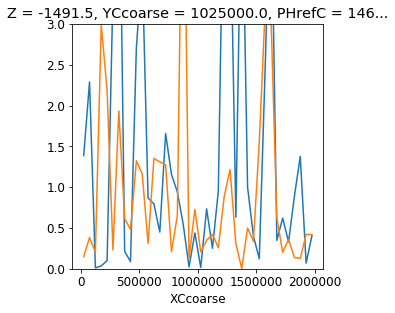

In [114]:
(np.abs(TAflux_along/(TSflux_along+TAflux_along))).sel(Z=-1500, YCcoarse=1000e3, method='nearest').plot()
(np.abs(TAflux_across/(TSflux_across+TAflux_across))).sel(Z=-1500, YCcoarse=1000e3, method='nearest').plot()
plt.ylim([0, 3])

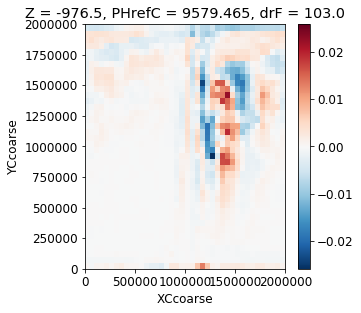

In [129]:
TSflux_along.sel(Z=-1000, method='nearest').plot()

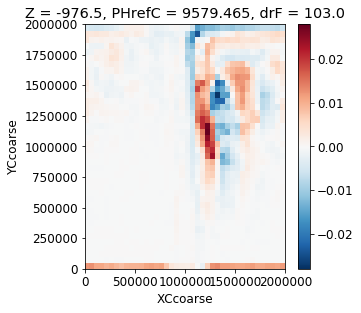

In [130]:
TAflux_along.sel(Z=-1000, method='nearest').plot()

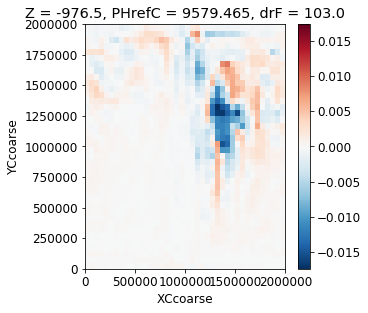

In [131]:
TSflux_across.sel(Z=-1000, method='nearest').plot()

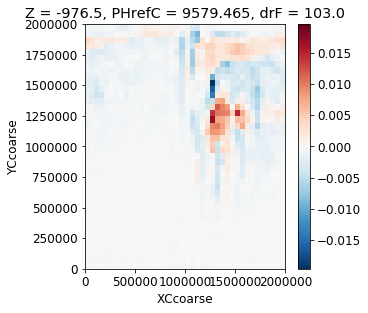

In [132]:
TAflux_across.sel(Z=-1000, method='nearest').plot()

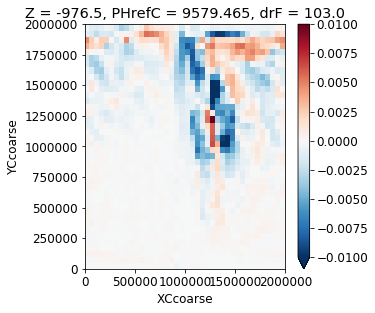

In [136]:
(TSflux_across+TAflux_across).sel(Z=-1000, method='nearest').plot(vmin=-0.01)

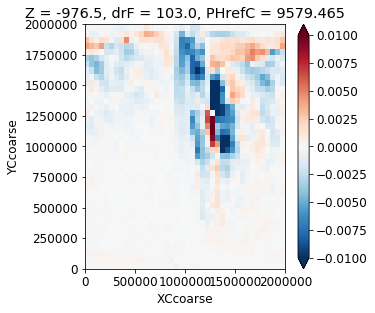

In [158]:
Ttrueflux_across.sel(Z=-1000, method='nearest').plot(vmin=-0.01)

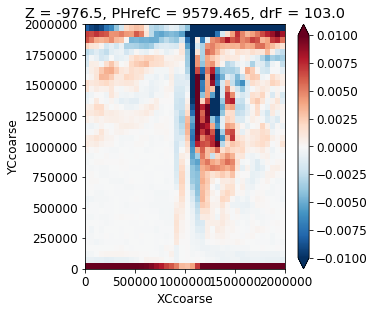

In [135]:
(TSflux_along+TAflux_along).sel(Z=-1000, method='nearest').plot(vmin=-0.01)

In [139]:
import matplotlib.colors as colors

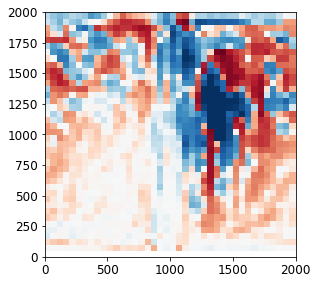

In [145]:
plt.pcolormesh(Xpcol/1e3, Ypcol/1e3, (TSflux_across).where(T_coarse.hFacCcoarse==1).sel(Z=-1000, method='nearest'),
                   vmin=-0.01, vmax=0.01, cmap='RdBu_r', norm=colors.SymLogNorm(linthresh=1e-4, linscale=0.1), rasterized=True)

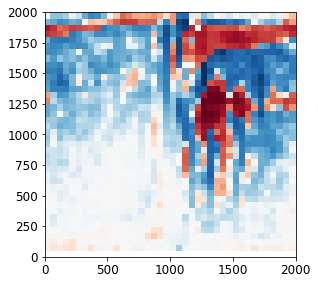

In [146]:
plt.pcolormesh(Xpcol/1e3, Ypcol/1e3, (TAflux_across).where(T_coarse.hFacCcoarse==1).sel(Z=-1000, method='nearest'),
                   vmin=-0.01, vmax=0.01, cmap='RdBu_r', norm=colors.SymLogNorm(linthresh=1e-4, linscale=0.1), rasterized=True)

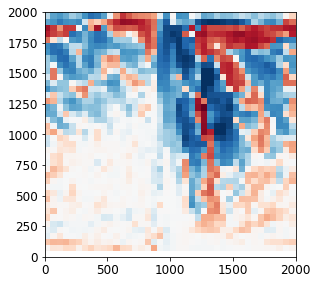

In [144]:
plt.pcolormesh(Xpcol/1e3, Ypcol/1e3, (TSflux_across+TAflux_across).where(T_coarse.hFacCcoarse==1).sel(Z=-1000, method='nearest'),
                   vmin=-0.01, vmax=0.01, cmap='RdBu_r', norm=colors.SymLogNorm(linthresh=1e-4, linscale=0.1), rasterized=True)

/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: The following kwargs were not used by contour: 'rasterized'
  
/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: The following kwargs were not used by contour: 'rasterized'
/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:42: UserWarning: The following kwargs were not used by contour: 'rasterized'


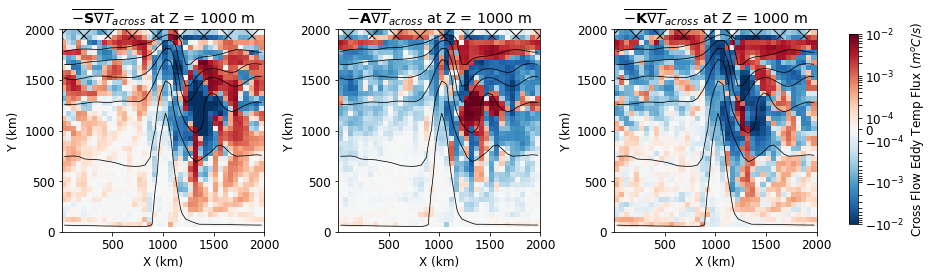

In [155]:
fig, ax = plt.subplots(1, 3, figsize=(13.5, 4.))
###
ax[0].pcolormesh(Xpcol/1e3, Ypcol/1e3, (TSflux_across).where(T_coarse.hFacCcoarse==1).sel(Z=-1000, method='nearest'),
                   vmin=-0.01, vmax=0.01, cmap='RdBu_r', norm=colors.SymLogNorm(linthresh=1e-4, linscale=0.1), rasterized=True)
ax[0].pcolor(Xpcol/1e3, Ypcol/1e3, T_coarse.hFacCcoarse.where(T_coarse.YCcoarse>=1900e3).sel(Z=-1000, method='nearest'),
              hatch='x', alpha=0)
im2 = ax[0].contour(Xcoarse/1e3, Ycoarse/1e3, T_coarse['T'].sel(Z=-1000, method='nearest'), 
                levels=np.linspace(1,3,9), colors='k', linewidths=0.75, rasterized=True)
ax[0].set_aspect('equal')
ax[0].set_title(r'$\overline{- \mathbf{S} \nabla T}_{across}$ at Z = 1000 m')
ax[0].set_xlabel('X (km)')
ax[0].set_ylabel('Y (km)')
ax[0].set_xticks([500, 1000, 1500, 2000])
ax[0].set_yticks([0, 500, 1000, 1500, 2000])

#fmt = {}
#strs = np.linspace(1,3,9)
#for l, s in zip(im2.levels, strs):
#    fmt[l] = str(s)
#ax[0].clabel(im2, im2.levels[::1], fmt=fmt, colors='k')

###
ax[1].pcolormesh(Xpcol/1e3, Ypcol/1e3, (TAflux_across).where(T_coarse.hFacCcoarse==1).sel(Z=-1000, method='nearest'),
                   vmin=-0.01, vmax=0.01, cmap='RdBu_r', norm=colors.SymLogNorm(linthresh=1e-4, linscale=0.1), rasterized=True)
ax[1].pcolor(Xpcol/1e3, Ypcol/1e3, T_coarse.hFacCcoarse.where(T_coarse.YCcoarse>=1900e3).sel(Z=-1000, method='nearest'),
              hatch='x', alpha=0)
ax[1].contour(Xcoarse/1e3, Ycoarse/1e3, T_coarse['T'].sel(Z=-1000, method='nearest'), 
                levels=np.linspace(1,3,9), colors='k', linewidths=0.75, rasterized=True)
ax[1].set_aspect('equal')
ax[1].set_title(r'$\overline{- \mathbf{A} \nabla T}_{across}$ at Z = 1000 m')
ax[1].set_xlabel('X (km)')
ax[1].set_ylabel('Y (km)')
ax[1].set_xticks([500, 1000, 1500, 2000])
ax[1].set_yticks([0, 500, 1000, 1500, 2000])

###
im= ax[2].pcolormesh(Xpcol/1e3, Ypcol/1e3, (TSflux_across + TAflux_across).where(T_coarse.hFacCcoarse==1).sel(Z=-1000, method='nearest'),
                   vmin=-0.01, vmax=0.01, cmap='RdBu_r', norm=colors.SymLogNorm(linthresh=1e-4, linscale=0.4), rasterized=True)
ax[2].pcolor(Xpcol/1e3, Ypcol/1e3, T_coarse.hFacCcoarse.where(T_coarse.YCcoarse>=1900e3).sel(Z=-1000, method='nearest'),
              hatch='x', alpha=0)
ax[2].contour(Xcoarse/1e3, Ycoarse/1e3, T_coarse['T'].sel(Z=-1000, method='nearest'), 
                levels=np.linspace(1,3,9), colors='k', linewidths=0.75, rasterized=True)
ax[2].set_aspect('equal')
ax[2].set_title(r'$\overline{- \mathbf{K} \nabla T}_{across}$ at Z = 1000 m')
ax[2].set_xlabel('X (km)')
ax[2].set_ylabel('Y (km)')
ax[2].set_xticks([500, 1000, 1500, 2000])
ax[2].set_yticks([0, 500, 1000, 1500, 2000])

plt.tight_layout()
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.2, 0.01, 0.66])
fig.colorbar(im, cax=cbar_ax)
cbar_ax.set_ylabel('Cross Flow Eddy Temp Flux ($ m ^oC/s$)')
plt.savefig('across_decomposition.pdf', dpi=200,bbox_inches='tight')

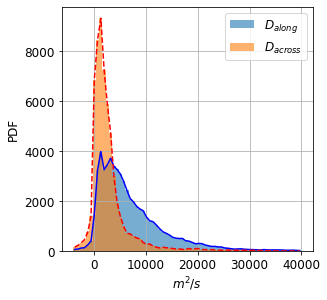

In [30]:
bins = np.linspace(-4e3,4e4,71)
[a,b,_]=diff_tensor.eigvalsSTcorr_aligned.isel(ii=0).where(T_coarse.hFacCcoarse==1.).plot.hist(bins=bins, alpha=0.6, label='$D_{along}$')
d = (b[0:-1] + b[1:])/2
plt.plot(d,a, color='b')

[a,b,_]=diff_tensor.eigvalsSTcorr_aligned.isel(ii=1).where(T_coarse.hFacCcoarse==1.).plot.hist(bins=bins, alpha=0.6, label='$D_{across}$')
d = (b[0:-1] + b[1:])/2
plt.plot(d,a, '--',color='r')

plt.legend()
plt.title('')
plt.xlabel('$m^2/s$')
plt.ylabel('PDF')
#plt.yscale('log')
plt.grid()

#plt.savefig('figKpdf.pdf', dpi=200,bbox_inches='tight')

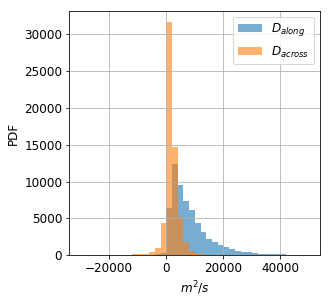

In [29]:
bins = np.linspace(-3e4,5e4,41)
[_,_,_]=diff_tensor.eigvalsST.isel(ii=2).where(T_coarse.hFacCcoarse==1.).plot.hist(bins=bins, alpha=0.6, label='$D_{along}$')
[_,_,_]=diff_tensor.eigvalsST.isel(ii=1).where(T_coarse.hFacCcoarse==1.).plot.hist(bins=bins, alpha=0.6, label='$D_{across}$')
plt.legend()
plt.title('')
plt.xlabel('$m^2/s$')
plt.ylabel('PDF')
#plt.yscale('log')
plt.grid()
#plt.savefig('figKpdf.pdf', dpi=200,bbox_inches='tight')

In [115]:
# calculate gradients on coarse grid 

grid_ds = xr.Dataset()
grid_ds['Tcoarse'] = T_coarse['T'] # use for Coarse grid
grid_ds['wVeltave'] = Model_Tav['wVeltave'] # needed for Z grid 
grid_ds = grid_ds.drop(['wVeltave','XC','YC']).isel(XC=0, YC=0)

ds = generate_grid_ds(grid_ds, {'X': 'XCcoarse', 'Y':'YCcoarse'})
grid = Grid(ds, periodic='X')

gSgbx = grid.interp(grid.diff(flux_rec_buoy_ST.UpCp, 'X'), 'X')/Lcoarse  #+ \
gSgby = grid.interp(grid.diff(flux_rec_buoy_ST.VpCp, 'Y', boundary='extend'), 'Y', boundary='extend')/Lcoarse #+ \
gSgbz = grid.interp(grid.diff(flux_rec_buoy_ST.WpCp, 'Z', boundary='extend'), 'Z', boundary='extend')/grid_ds.drF

gAgbx = grid.interp(grid.diff(flux_rec_buoy_AT.UpCp, 'X'), 'X')/Lcoarse  #+ \
gAgby = grid.interp(grid.diff(flux_rec_buoy_AT.VpCp, 'Y', boundary='extend'), 'Y', boundary='extend')/Lcoarse #+ \
gAgbz = grid.interp(grid.diff(flux_rec_buoy_AT.WpCp, 'Z', boundary='extend'), 'Z', boundary='extend')/grid_ds.drF

gKgbx = grid.interp(grid.diff(frb.UpCp, 'X'), 'X')/Lcoarse  #+ \
gKgby = grid.interp(grid.diff(frb.VpCp, 'Y', boundary='extend'), 'Y', boundary='extend')/Lcoarse #+ \
gKgbz = grid.interp(grid.diff(frb.WpCp, 'Z', boundary='extend'), 'Z', boundary='extend')/grid_ds.drF

gTfluxx = grid.interp(grid.diff(T_coarse.UpTp, 'X'), 'X')/Lcoarse  #+ \
gTfluxy = grid.interp(grid.diff(T_coarse.VpTp, 'Y', boundary='extend'), 'Y', boundary='extend')/Lcoarse #+ \
gTfluxz = grid.interp(grid.diff(T_coarse.WpTp, 'Z', boundary='extend'), 'Z', boundary='extend')/grid_ds.drF

Divergence plots, copied code from plots_reproduce

In [35]:
Xcoarse = T_coarse.XCcoarse.data
Ycoarse = T_coarse.YCcoarse.data
Z = T_coarse.Z.data

Ypcol = np.append(Ycoarse, Ycoarse[-1]+Lcoarse)-Lcoarse/2
Xpcol = np.append(Xcoarse, Xcoarse[-1]+Lcoarse)-Lcoarse/2
Zpcol = np.append(Z, Z[-1])

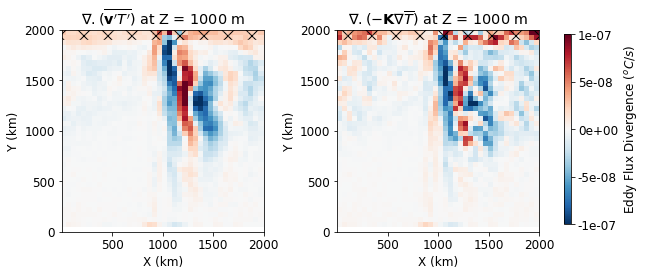

In [128]:
fig, ax = plt.subplots(1, 2, figsize=(9, 4.))
###
ax[0].pcolormesh(Xpcol/1e3, Ypcol/1e3, (gTfluxx + gTfluxy + gTfluxz).where(T_coarse.hFacCcoarse==1).sel(Z=-1000, method='nearest'),
                   vmin=-1e-7, vmax=1e-7, cmap='RdBu_r', rasterized=True)
ax[0].pcolor(Xpcol/1e3, Ypcol/1e3, T_coarse.hFacCcoarse.where(T_coarse.YCcoarse>=1900e3).sel(Z=-1000, method='nearest'),
              hatch='x', alpha=0)
#im2 = ax[0].contour(Xcoarse/1e3, Ycoarse/1e3, T_coarse['T'].sel(Z=-1000, method='nearest'), 
#                levels=np.linspace(1,3,9), colors='k', linewidths=0.75, rasterized=True)
ax[0].set_aspect('equal')
ax[0].set_title(r'$\nabla . (\overline{\mathbf{v}^\prime T^\prime})$ at Z = 1000 m')
ax[0].set_xlabel('X (km)')
ax[0].set_ylabel('Y (km)')
ax[0].set_xticks([500, 1000, 1500, 2000])
ax[0].set_yticks([0, 500, 1000, 1500, 2000])

fmt = {}
strs = np.linspace(1,3,9)
for l, s in zip(im2.levels, strs):
    fmt[l] = str(s)
ax[0].clabel(im2, im2.levels[::1], fmt=fmt, colors='k')

###
im= ax[1].pcolormesh(Xpcol/1e3, Ypcol/1e3, (gKgbx+gKgby+gKgbz).where(T_coarse.hFacCcoarse==1).sel(Z=-1000, method='nearest'), 
                   vmin=-1e-7, vmax=1e-7, cmap='RdBu_r', rasterized=True)
ax[1].pcolor(Xpcol/1e3, Ypcol/1e3, T_coarse.hFacCcoarse.where(T_coarse.YCcoarse>=1900e3).sel(Z=-1000, method='nearest'),
              hatch='x', alpha=0)
#ax[1].contour(Xcoarse/1e3, Ycoarse/1e3, T_coarse['T'].sel(Z=-1000, method='nearest'), 
#                levels=np.linspace(1,3,9), colors='k', linewidths=0.75, rasterized=True)
ax[1].set_aspect('equal')
ax[1].set_title(r'$\nabla.(-\mathbf{K} \nabla \overline{T})$ at Z = 1000 m')
ax[1].set_xlabel('X (km)')
ax[1].set_ylabel('Y (km)')
ax[1].set_xticks([500, 1000, 1500, 2000])
ax[1].set_yticks([0, 500, 1000, 1500, 2000])

plt.tight_layout()
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.2, 0.01, 0.66])
fig.colorbar(im, cax=cbar_ax,format='%.0e',)
cbar_ax.set_ylabel('Eddy Flux Divergence ($ ^oC/s$)')
plt.savefig('div_flux_reconstruct.pdf', dpi=200,bbox_inches='tight')


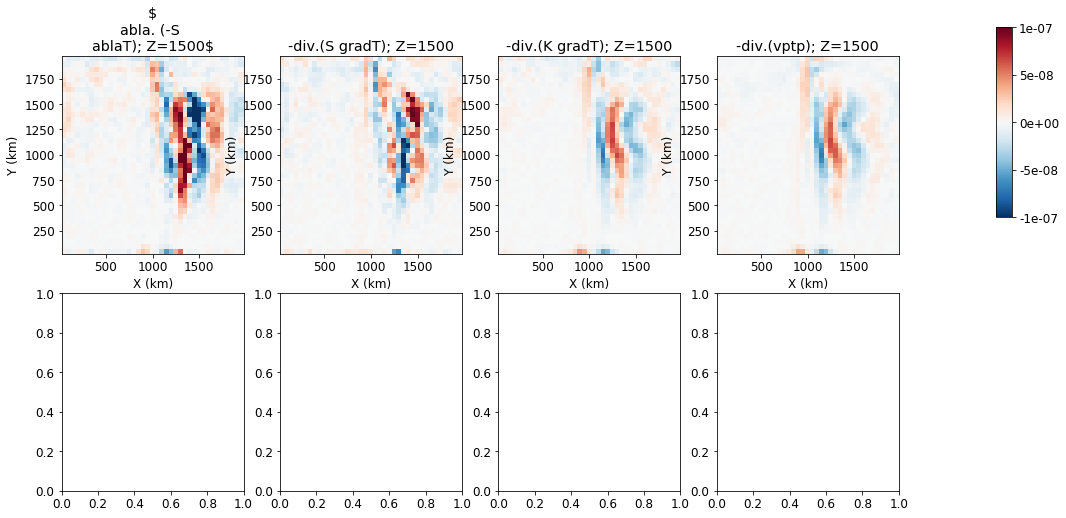

In [120]:
fig, ax = plt.subplots(2, 4, figsize=(15, 8))

ax[0,0].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, (gSgbx+gSgby+gSgbz).sel(Z=-1500, method='nearest'), vmin=-1e-7, vmax=1e-7, cmap='RdBu_r')
ax[0,0].set_title('$\nabla. (-S \nablaT); Z=1500$')
ax[0,0].set_xlabel('X (km)')
ax[0,0].set_ylabel('Y (km)')

ax[0,1].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, (gAgbx+gAgby+gAgbz).sel(Z=-1500, method='nearest'), vmin=-1e-7, vmax=1e-7, cmap='RdBu_r')
ax[0,1].set_title('-div.(S gradT); Z=1500')
ax[0,1].set_xlabel('X (km)')
ax[0,1].set_ylabel('Y (km)')

ax[0,2].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, (gKgbx+gKgby+gKgbz).sel(Z=-1500, method='nearest'), vmin=-1e-7, vmax=1e-7, cmap='RdBu_r')
ax[0,2].set_title('-div.(K gradT); Z=1500')
ax[0,2].set_xlabel('X (km)')
ax[0,2].set_ylabel('Y (km)')

im=ax[0,3].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, (gTfluxx+gTfluxy+gTfluxz).sel(Z=-1500, method='nearest'), vmin=-1e-7, vmax=1e-7, cmap='RdBu_r')
ax[0,3].set_title('-div.(vptp); Z=1500')
ax[0,3].set_xlabel('X (km)')
ax[0,3].set_ylabel('Y (km)')
cbar_ax = fig.add_axes([0.99, 0.6, 0.015, 0.33])
fig.colorbar(im, cax=cbar_ax,format='%.0e')

NameError: name 'gSgb1' is not defined

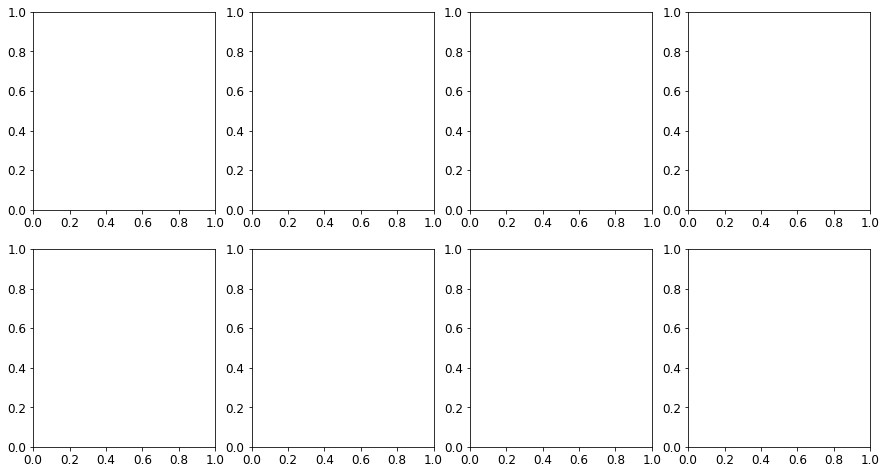

In [116]:
fig, ax = plt.subplots(2, 4, figsize=(15, 8))

ax[0,0].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, (gSgbx+gSgby+gSgbz).sel(Z=-1500, method='nearest'), vmin=-1e-7, vmax=1e-7, cmap='RdBu_r')
ax[0,0].set_title('$\nabla. (-S \nablaT); Z=1500$')
ax[0,0].set_xlabel('X (km)')
ax[0,0].set_ylabel('Y (km)')

ax[0,1].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, (gAgbx+gAgby+gAgbz).sel(Z=-1500, method='nearest'), vmin=-1e-7, vmax=1e-7, cmap='RdBu_r')
ax[0,1].set_title('-div.(S gradT); Z=1500')
ax[0,1].set_xlabel('X (km)')
ax[0,1].set_ylabel('Y (km)')

ax[0,2].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, (gKgb1+gKgb2+gKgb3).sel(Z=-1500, method='nearest'), vmin=-1e-7, vmax=1e-7, cmap='RdBu_r')
ax[0,2].set_title('-div.(K gradT); Z=1500')
ax[0,2].set_xlabel('X (km)')
ax[0,2].set_ylabel('Y (km)')

im=ax[0,3].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, (gTflux1+gTflux2+gTflux3).sel(Z=-1500, method='nearest'), vmin=-1e-7, vmax=1e-7, cmap='RdBu_r')
ax[0,3].set_title('-div.(vptp); Z=1500')
ax[0,3].set_xlabel('X (km)')
ax[0,3].set_ylabel('Y (km)')
cbar_ax = fig.add_axes([0.99, 0.6, 0.015, 0.33])
fig.colorbar(im, cax=cbar_ax,format='%.0e')


ax[1,0].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, (gSgb1+gSgb2+gSgb3).sel(Z=-500, method='nearest'), vmin=-5e-7, vmax=5e-7, cmap='RdBu_r')
ax[1,0].set_title('div.VpTp; Z=500')
ax[1,0].set_xlabel('X (km)')
ax[1,0].set_ylabel('Y (km)')

ax[1,1].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, (gAgb1+gAgb2+gAgb3).sel(Z=-500, method='nearest'), vmin=-5e-7, vmax=5e-7, cmap='RdBu_r')
ax[1,1].set_title('-div.(S gradT); Z=500')
ax[1,1].set_xlabel('X (km)')
ax[1,1].set_ylabel('Y (km)')

ax[1,2].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, (gKgb1+gKgb2+gKgb3).sel(Z=-500, method='nearest'), vmin=-5e-7, vmax=5e-7, cmap='RdBu_r')
ax[1,2].set_title('-div.(K gradT); Z=500')
ax[1,2].set_xlabel('X (km)')
ax[1,2].set_ylabel('Y (km)')

im=ax[1,3].pcolormesh(Xcoarse/1e3, Ycoarse/1e3, (gTflux1+gTflux2+gTflux3).sel(Z=-500, method='nearest'), vmin=-5e-7, vmax=5e-7, cmap='RdBu_r')
ax[1,3].set_title('-div.(vptp); Z=500')
ax[1,3].set_xlabel('X (km)')
ax[1,3].set_ylabel('Y (km)')
cbar_ax = fig.add_axes([0.99, 0.1, 0.015, 0.33])
fig.colorbar(im, cax=cbar_ax,format='%.0e')

plt.tight_layout()

Summary: 
- Decomposition works WAY better than anyone would have guesed! (could look at error metrics too. Even for gradients)
- Both A and S are necessary when we want to reconstruct flux of any tracer (even buoyancy!!)
- The flux resulting from S, is not the same as the $F_{\perp}$.
- Thus, A is not sufficient to recontruxt T flux -> $A \neq A_{GM}$.  (It does not seem that they are the same even approximately.)

Summary:
1. In the variance equation for a single tracer the symmetric tensor provides too much information. Three tracer variance equations are needed to fully pin down the symmetric tensor. 
2. The equation for tracer variance normalized by its gradient ($\frac{b'^2}{N^2}$) can be used to derive an equation where A features. This can also be done for 3 tracers in principle to fully determine A. 